In [2]:
import numpy as np               
import pandas as pd              
from scipy.stats import chi2_contingency
import seaborn as sns

import matplotlib.pyplot as plt  
%matplotlib inline  
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [431]:
data = pd.read_csv('psyco.csv')

In [432]:
data

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,1,Complete Physical Attendance,Yes
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,111,Complete Physical Attendance,Maybe
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0,1111,110,Complete Physical Attendance,Maybe
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5,1111,1100,Complete Physical Attendance,Yes


# Basic Statistics

In [433]:
data.duplicated().sum()

762

In [434]:
data.isnull().sum()

age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

In [435]:
data.dtypes

age                object
gender             object
occupation         object
line_of_work       object
time_bp             int64
time_dp             int64
travel_time       float64
easeof_online       int64
home_env            int64
prod_inc          float64
sleep_bal         float64
new_skill         float64
fam_connect       float64
relaxed           float64
self_time         float64
like_hw             int64
dislike_hw          int64
prefer             object
certaindays_hw     object
dtype: object

In [436]:
data.shape

(1175, 19)

In [437]:
data.describe()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000


In [438]:
data['age'].value_counts()

age
19-25     345
26-32     261
40-50     181
50-60     170
33-40     102
Dec-18     74
60+        42
Name: count, dtype: int64

In [439]:
# For the age category Dec - 18 we convert it into 0-18 for ease of understanding.
age_mapping = {'Dec-18': '0-18'}
data['age'] = data['age'].replace(age_mapping)

In [440]:
data['age'].value_counts()

age
19-25    345
26-32    261
40-50    181
50-60    170
33-40    102
0-18      74
60+       42
Name: count, dtype: int64

<Axes: xlabel='age'>

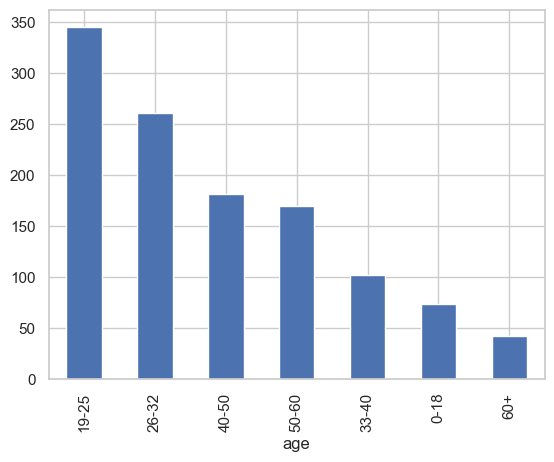

In [441]:
data['age'].value_counts().plot(kind='bar')

In [442]:
data['gender'].value_counts()

gender
Male                 649
Female               518
Prefer not to say      8
Name: count, dtype: int64

<Axes: ylabel='count'>

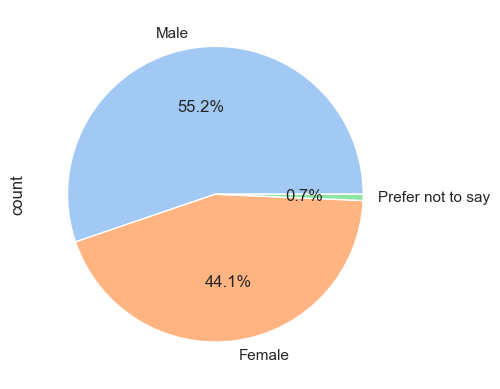

In [443]:
data['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette("pastel"))

In [444]:
data['occupation'].value_counts()

occupation
Working Professional                                    479
Student in College                                      358
Entrepreneur                                            119
Homemaker                                                82
Medical Professional aiding efforts against COVID-19     73
Currently Out of Work                                    44
Student in School                                        18
Retired/Senior Citizen                                    2
Name: count, dtype: int64

<Axes: xlabel='occupation'>

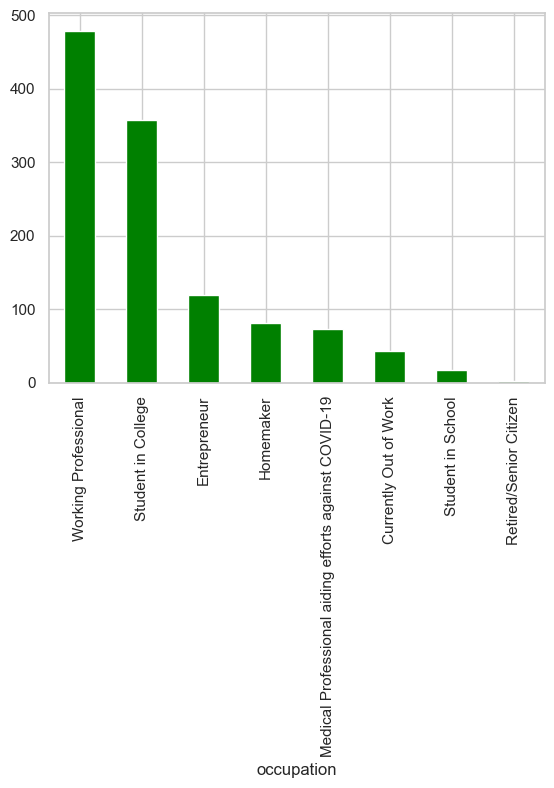

In [445]:
data['occupation'].value_counts().plot(kind='bar',color='green')

In [446]:
data['line_of_work'].value_counts()

line_of_work
Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect                3
APSPDCL                  1
Architecture             1
Name: count, dtype: int64

In [447]:
data['line_of_work'].isnull().sum()

696

<Axes: xlabel='line_of_work'>

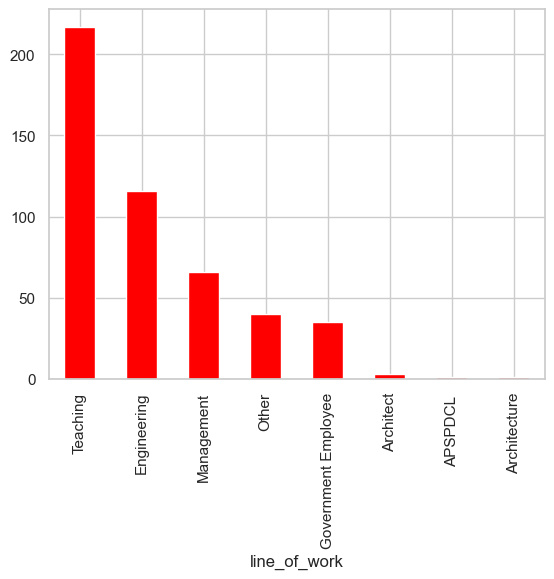

In [448]:
data['line_of_work'].value_counts().plot(kind='bar',color='red')

In [449]:
data['time_bp'].value_counts()

time_bp
7     412
9     343
5     283
11     53
12     51
4      33
Name: count, dtype: int64

In [450]:
data['time_bp'].describe()

count    1175.000000
mean        7.415319
std         2.005385
min         4.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        12.000000
Name: time_bp, dtype: float64

<Axes: >

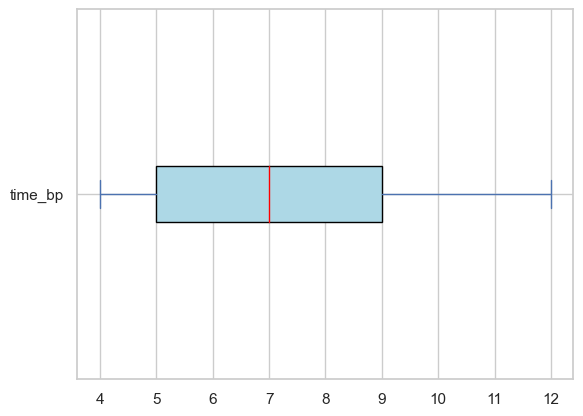

In [451]:
data['time_bp'].plot(kind='box',vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

In [452]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(data['time_bp'])

print(f'Skewness: {skewness}')


Skewness: 0.35811914139791756


In [453]:
data['time_dp'].value_counts()

time_dp
9     326
7     238
5     180
12    169
4     149
11    113
Name: count, dtype: int64

In [454]:
data['time_dp'].describe()

count    1175.000000
mean        7.971915
std         2.657007
min         4.000000
25%         5.000000
50%         9.000000
75%         9.000000
max        12.000000
Name: time_dp, dtype: float64

<Axes: >

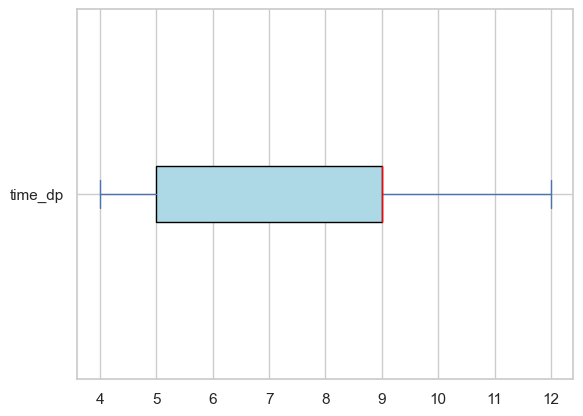

In [455]:
data['time_dp'].plot(kind='box',vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

In [456]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(data['time_dp'])

print(f'Skewness: {skewness}')


Skewness: 0.01169085673066641


In [457]:
data['travel_time'].describe()

count    1175.000000
mean        1.027660
std         0.713314
min         0.500000
25%         0.500000
50%         0.500000
75%         1.500000
max         3.000000
Name: travel_time, dtype: float64

<Axes: >

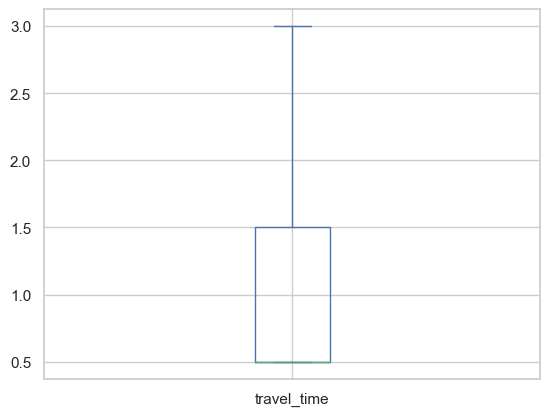

In [458]:
data['travel_time'].plot(kind='box')

C:\Users\leonp\AppData\Local\Temp\ipykernel_24112\4024489616.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['travel_time'], shade=True)
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


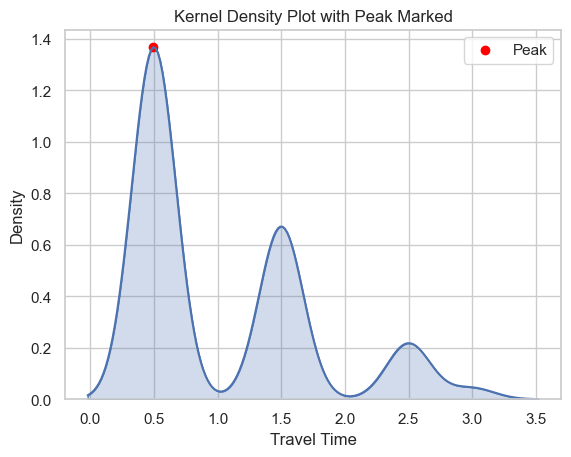

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data['travel_time'], shade=True)

# Find the peak (highest point) of the kernel density plot
kde_data = sns.kdeplot(data['travel_time']).get_lines()[0].get_data()
x_peak = kde_data[0][kde_data[1].argmax()]

# Annotate the peak with a dot
plt.scatter(x_peak, kde_data[1].max(), color='red', marker='o', label='Peak')

# Add labels and title
plt.xlabel('Travel Time')
plt.ylabel('Density')
plt.title('Kernel Density Plot with Peak Marked')

# Show the plot
plt.legend()
plt.show()



In [460]:
data['travel_time'].value_counts()

travel_time
0.5    699
1.5    343
2.5    111
3.0     22
Name: count, dtype: int64

In [461]:
data['easeof_online'].value_counts()

easeof_online
1    329
2    285
4    249
3    239
5     73
Name: count, dtype: int64

In [462]:
data['easeof_online'].value_counts()

easeof_online
1    329
2    285
4    249
3    239
5     73
Name: count, dtype: int64

C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


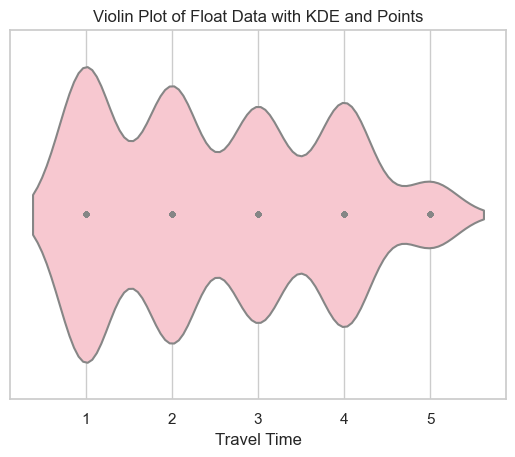

In [463]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x=data['easeof_online'], inner='points', color='pink')


plt.xlabel('Travel Time')
plt.title('Violin Plot of Float Data with KDE and Points')
plt.show()


In [464]:
data['home_env'].value_counts()

home_env
3    327
2    309
1    215
4    200
5    124
Name: count, dtype: int64

C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


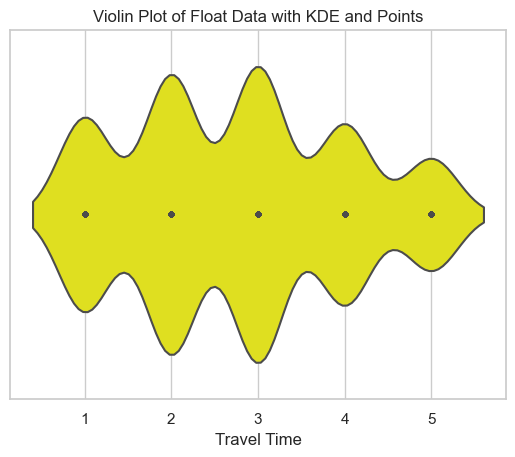

In [465]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x=data['home_env'], inner='points', color='yellow')


plt.xlabel('Travel Time')
plt.title('Violin Plot of Float Data with KDE and Points')
plt.show()


In [466]:
data['prod_inc'].value_counts()

prod_inc
 0.5    302
 0.0    295
-0.5    279
-1.0    150
 1.0    149
Name: count, dtype: int64

In [467]:
mapping1 = {-1: 'Strongly Disagree ', -0.5: 'Disagree', 0: 'Neither Agree nor Disagree', 0.5: 'Agree', 1: 'Strongly Agree'}
data['prod_inc'] = data['prod_inc'].replace(mapping1)

In [468]:
data['prod_inc'].value_counts()

prod_inc
Agree                         302
Neither Agree nor Disagree    295
Disagree                      279
Strongly Disagree             150
Strongly Agree                149
Name: count, dtype: int64

<Axes: xlabel='prod_inc'>

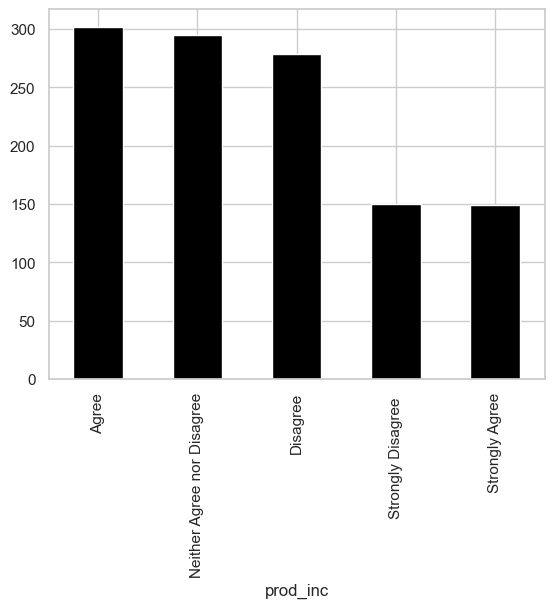

In [469]:
data['prod_inc'].value_counts().plot(kind='bar',color='black')

In [470]:
data['sleep_bal'].value_counts()

sleep_bal
-0.5    313
 0.5    271
 0.0    270
-1.0    214
 1.0    107
Name: count, dtype: int64

In [471]:
mapping2= {-1: 'Very Bad', -0.5: 'Bad', 0: 'Neutral', 0.5: 'Good', 1: 'Very Good'}
data['sleep_bal'] = data['sleep_bal'].replace(mapping2)

In [472]:
data['sleep_bal'].value_counts()

sleep_bal
Bad          313
Good         271
Neutral      270
Very Bad     214
Very Good    107
Name: count, dtype: int64

<Axes: ylabel='count'>

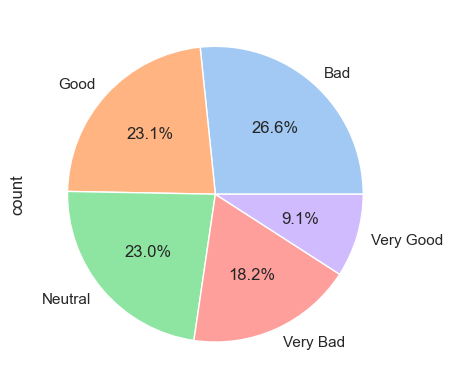

In [473]:
data['sleep_bal'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette("pastel"))

In [474]:
data['new_skill'].value_counts()

new_skill
 0.5    366
-0.5    249
 1.0    236
 0.0    202
-1.0    122
Name: count, dtype: int64

In [475]:
mapping3 = {-1: 'Strongly Disagree ', -0.5: 'Disagree', 0: 'Neither Agree nor Disagree', 0.5: 'Agree', 1: 'Strongly Agree'}
data['new_skill'] = data['new_skill'].replace(mapping3)

In [476]:
data['new_skill'].value_counts()

new_skill
Agree                         366
Disagree                      249
Strongly Agree                236
Neither Agree nor Disagree    202
Strongly Disagree             122
Name: count, dtype: int64

<Axes: xlabel='new_skill'>

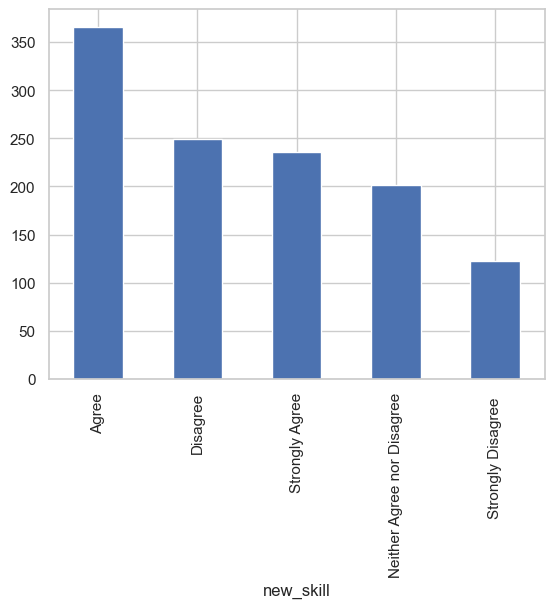

In [477]:
data['new_skill'].value_counts().plot(kind='bar')

In [478]:
data['fam_connect'].value_counts()

fam_connect
 0.5    414
 1.0    326
-1.0    181
 0.0    162
-0.5     92
Name: count, dtype: int64

In [479]:
mapping4 = {-1: 'Strongly Disagree ', -0.5: 'Disagree', 0: 'Neither Agree nor Disagree', 0.5: 'Agree', 1: 'Strongly Agree'}
data['fam_connect'] = data['fam_connect'].replace(mapping4)

In [480]:
data['fam_connect'].value_counts()

fam_connect
Agree                         414
Strongly Agree                326
Strongly Disagree             181
Neither Agree nor Disagree    162
Disagree                       92
Name: count, dtype: int64

<Axes: xlabel='fam_connect'>

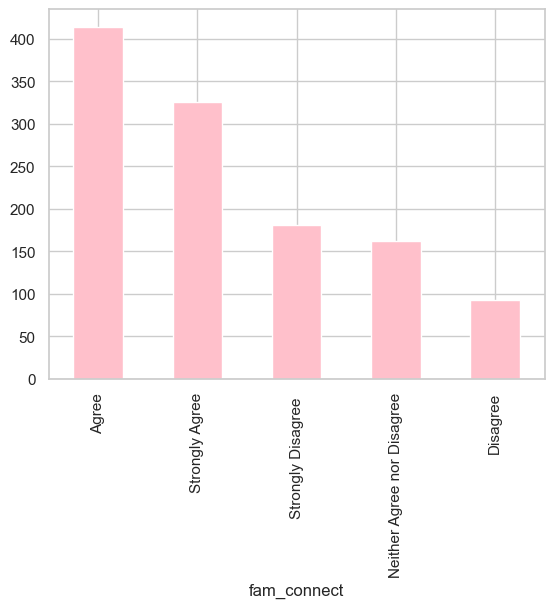

In [481]:
data['fam_connect'].value_counts().plot(kind='bar',color='pink')

In [482]:
data['relaxed'].value_counts()

relaxed
 0.0    306
 0.5    274
-0.5    268
 1.0    183
-1.0    144
Name: count, dtype: int64

In [483]:
mapping5 = {-1: 'Strongly Disagree ', -0.5: 'Disagree', 0: 'Neither Agree nor Disagree', 0.5: 'Agree', 1: 'Strongly Agree'}
data['relaxed'] = data['relaxed'].replace(mapping5)

In [484]:
data['relaxed'].value_counts()

relaxed
Neither Agree nor Disagree    306
Agree                         274
Disagree                      268
Strongly Agree                183
Strongly Disagree             144
Name: count, dtype: int64

<Axes: ylabel='count'>

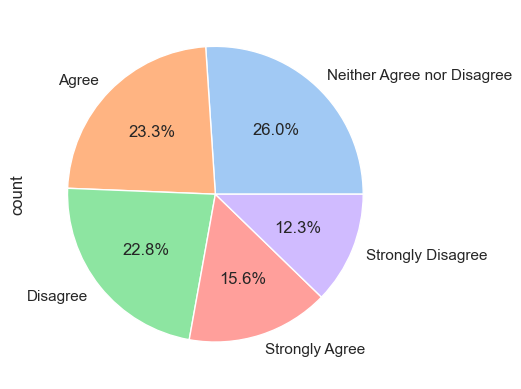

In [485]:
data['relaxed'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette("pastel"))

In [486]:
data['self_time'].value_counts()

self_time
 0.0    417
 0.5    289
-0.5    252
 1.0    148
-1.0     69
Name: count, dtype: int64

In [487]:
mapping6 = {-1: 'Strongly Disagree ', -0.5: 'Disagree', 0: 'Neither Agree nor Disagree', 0.5: 'Agree', 1: 'Strongly Agree'}
data['self_time'] = data['self_time'].replace(mapping6)

In [488]:
data['self_time'].value_counts()

self_time
Neither Agree nor Disagree    417
Agree                         289
Disagree                      252
Strongly Agree                148
Strongly Disagree              69
Name: count, dtype: int64

<Axes: xlabel='self_time'>

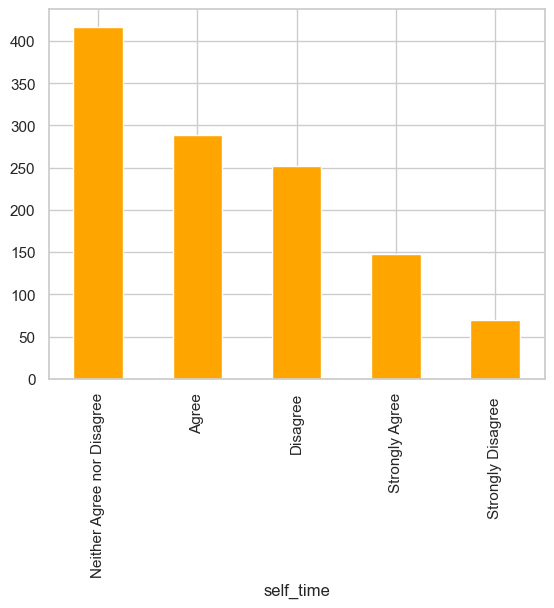

In [489]:
data['self_time'].value_counts().plot(kind='bar',color='orange')

In [490]:
data['like_hw'].value_counts()

like_hw
100     233
1100    188
1000    188
1110    188
1111     95
10       64
110      61
1010     55
1001     42
1        17
1011     17
11        9
1101      7
101       6
111       5
Name: count, dtype: int64

In [491]:
mapping7 = {1:'0', 10: '1', 11: '2', 100: '3', 101: '4',110:'5',111:'6',1000:'7',1001:'8',1010:'9',1011:'10',1100:'11',1101:'12',1110:'13',1111:'14'}
data['like_hw'] = data['like_hw'].replace(mapping7)

In [492]:
data['like_hw'].value_counts()

like_hw
3     233
11    188
7     188
13    188
14     95
1      64
5      61
9      55
8      42
0      17
10     17
2       9
12      7
4       6
6       5
Name: count, dtype: int64

In [493]:
data['like_hw'].describe()

count     1175
unique      15
top          3
freq       233
Name: like_hw, dtype: object

<Axes: xlabel='like_hw'>

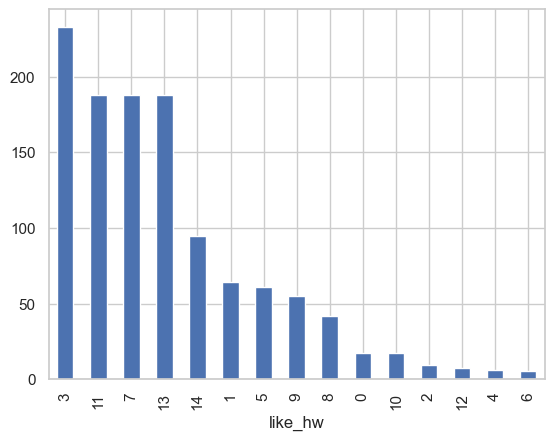

In [494]:
data['like_hw'].value_counts().plot(kind='bar')

In [495]:
data['dislike_hw'].value_counts()

dislike_hw
1111    264
1       211
1000    150
101     110
1100     87
111      67
1101     61
1011     59
100      45
1010     30
1001     21
1110     20
10       20
110      19
11       11
Name: count, dtype: int64

In [496]:
mapping8 = {1:'0', 10: '1', 11: '2', 100: '3', 101: '4',110:'5',111:'6',1000:'7',1001:'8',1010:'9',1011:'10',1100:'11',1101:'12',1110:'13',1111:'14'}
data['dislike_hw'] = data['dislike_hw'].replace(mapping8)

In [497]:
data['dislike_hw'].value_counts()

dislike_hw
14    264
0     211
7     150
4     110
11     87
6      67
12     61
10     59
3      45
9      30
8      21
13     20
1      20
5      19
2      11
Name: count, dtype: int64

In [266]:
data['dislike_hw'].describe()

count     1175
unique      15
top         14
freq       264
Name: dislike_hw, dtype: object

<Axes: xlabel='dislike_hw'>

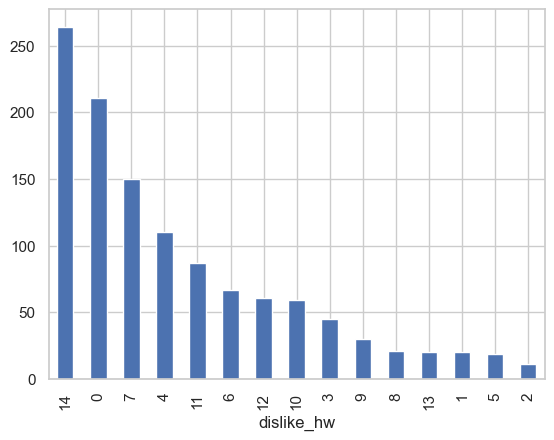

In [272]:
data['dislike_hw'].value_counts().plot(kind='bar')

In [273]:
data['prefer'].value_counts()

prefer
Complete Physical Attendance    836
Work/study from home            339
Name: count, dtype: int64

<Axes: ylabel='count'>

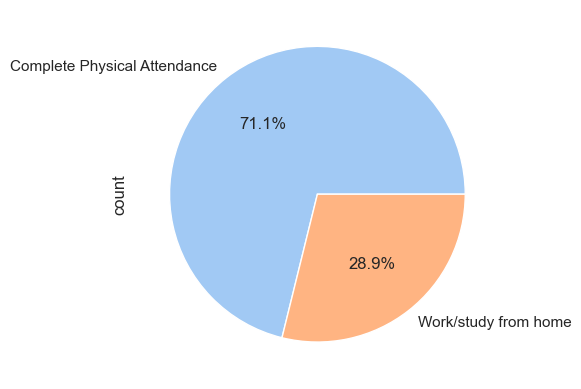

In [275]:
data['prefer'].value_counts().plot(kind='pie',autopct='%.1f%%', colors=sns.color_palette("pastel"))

In [276]:
data['certaindays_hw'].value_counts()

certaindays_hw
Yes      568
No       309
Maybe    298
Name: count, dtype: int64

<Axes: xlabel='certaindays_hw'>

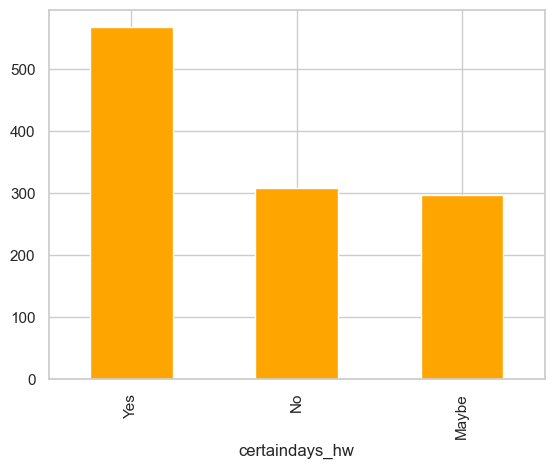

In [277]:
data['certaindays_hw'].value_counts().plot(kind='bar',color='orange')

# Data Visualization

In [278]:
occupation_time_data = data[['occupation', 'time_bp', 'time_dp']]

In [279]:
occupation_avg_time = occupation_time_data.groupby('occupation').mean()
occupation_avg_time

,time_bp,time_dp
occupation,,
Currently Out of Work,8.545455,4.886364
Entrepreneur,6.621849,8.857143
Homemaker,4.951220,10.158537
Medical Professional aiding efforts against COVID-19,8.945205,9.739726
Retired/Senior Citizen,8.000000,10.500000
Student in College,6.885475,6.458101
Student in School,7.222222,6.388889
Working Professional,8.098121,8.572025


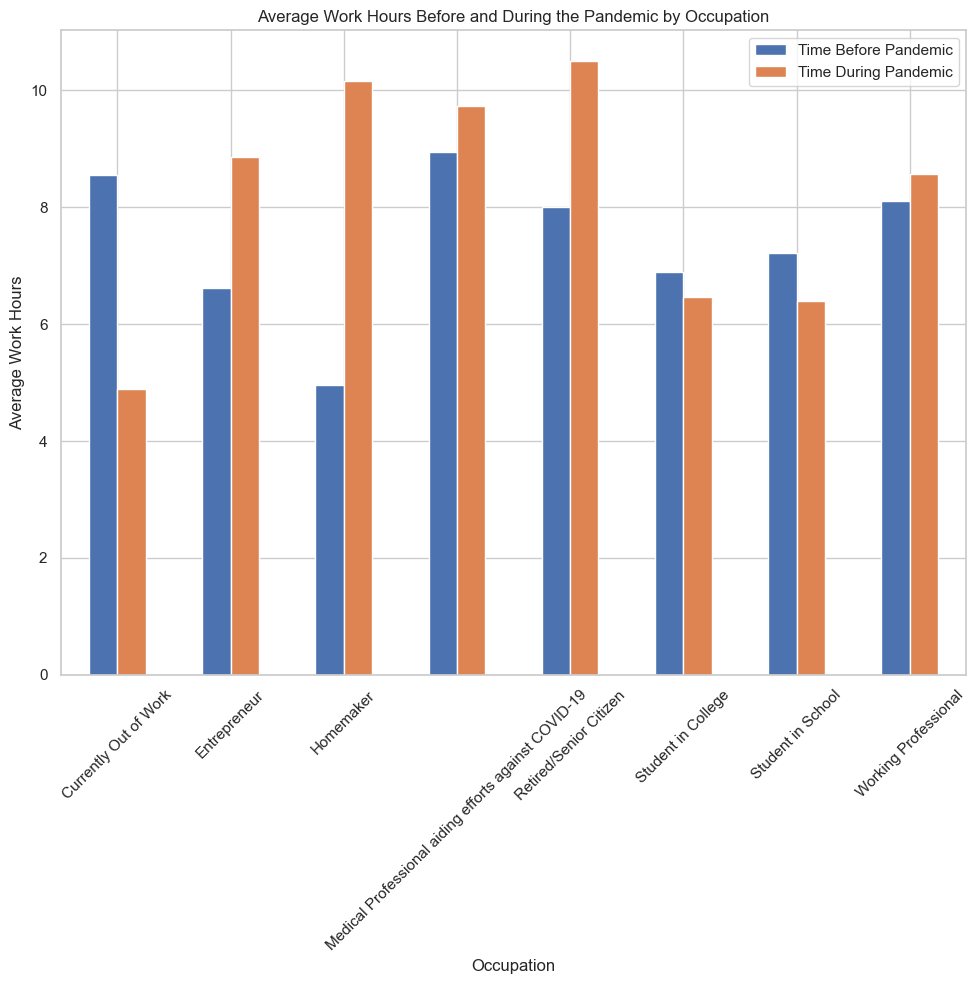

In [280]:
import matplotlib.pyplot as plt

occupation_avg_time.plot(kind='bar', figsize=(10, 10))
plt.xlabel('Occupation')
plt.ylabel('Average Work Hours')
plt.title('Average Work Hours Before and During the Pandemic by Occupation')
plt.xticks(rotation= 45)
plt.legend(['Time Before Pandemic', 'Time During Pandemic'])
plt.tight_layout()
plt.show()

In [293]:
crosstab1 = pd.crosstab(data['gender'],data['home_env'])
crosstab1

home_env,1,2,3,4,5
gender,,,,,
Female,109,180,75,122,32
Male,104,127,250,77,91
Prefer not to say,2,2,2,1,1


C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


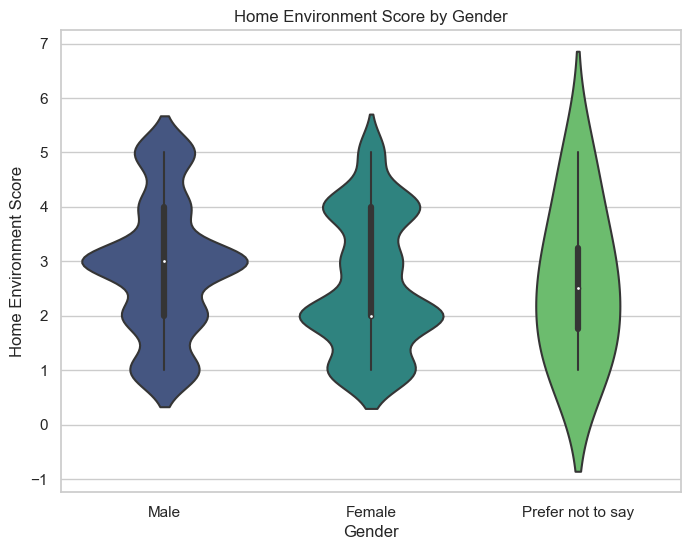

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(8, 6))

sns.violinplot(x='gender', y='home_env', data=data, palette='viridis', ax=axs)

axs.set_title('Home Environment Score by Gender')
axs.set_xlabel('Gender')
axs.set_ylabel('Home Environment Score')

plt.show()


In [294]:
crosstab0= pd.crosstab(data['time_bp'],data['time_dp'])
crosstab0

time_dp,4,5,7,9,11,12
time_bp,,,,,,
4,24,2,4,3,0,0
5,37,58,53,65,9,61
7,71,63,122,130,18,8
9,14,54,53,126,80,16
11,2,3,5,2,5,36
12,1,0,1,0,1,48


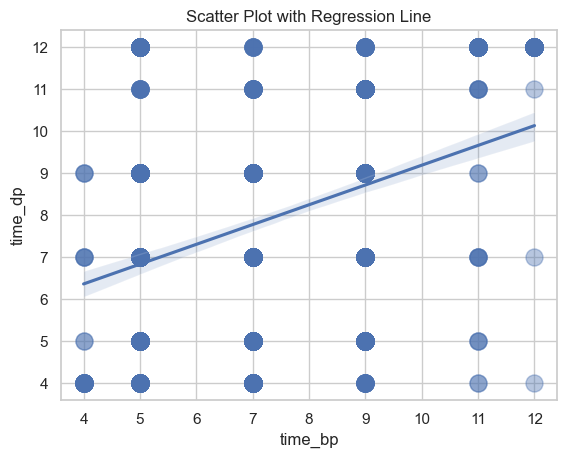

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='time_bp', y='time_dp', data=data, scatter_kws={'s': 150, 'alpha': 0.4})
plt.xlabel('time_bp')
plt.ylabel('time_dp')
plt.title('Scatter Plot with Regression Line')
plt.show()


In [307]:
data1 = pd.read_csv('psyco.csv')

In [308]:
crosstab1= pd.crosstab(data1['occupation'],data1['sleep_bal'])
crosstab1

sleep_bal,-1.0,-0.5,0.0,0.5,1.0
occupation,,,,,
Currently Out of Work,1,3,0,2,38
Entrepreneur,20,42,4,53,0
Homemaker,30,49,2,1,0
Medical Professional aiding efforts against COVID-19,20,22,31,0,0
Retired/Senior Citizen,1,0,1,0,0
Student in College,89,94,108,42,25
Student in School,5,3,6,2,2
Working Professional,48,100,118,171,42


C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leonp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


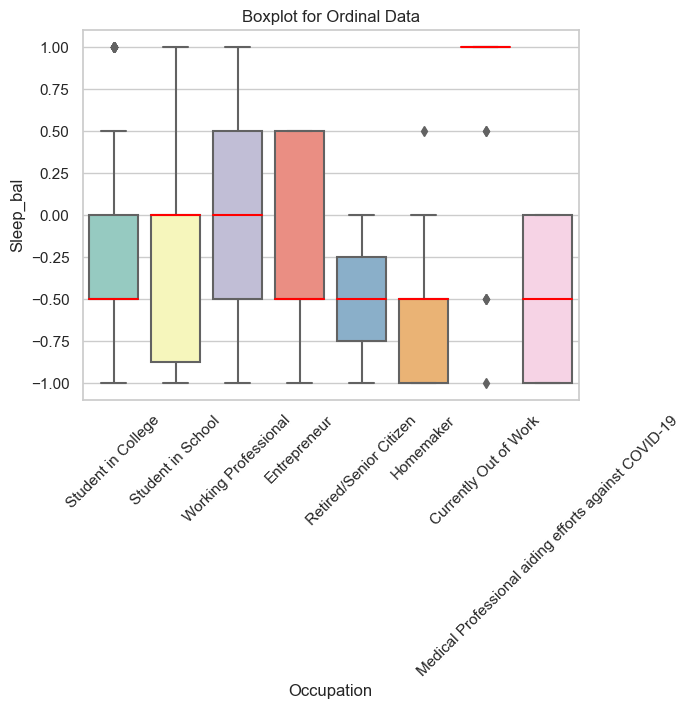

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='occupation', y='sleep_bal', data=data1,palette='Set3',medianprops=dict(color='red'))
plt.xlabel('Occupation')
plt.ylabel('Sleep_bal')
plt.title('Boxplot for Ordinal Data')
plt.xticks(rotation=45)
plt.show()


In [312]:
crosstab2= pd.crosstab([data1['fam_connect'],data1['relaxed']],data1['self_time'])
crosstab2

self_time            -1.0  -0.5   0.0   0.5   1.0
fam_connect relaxed                              
-1.0        -1.0       38    44     2     0     1
            -0.5        4    52     7     0     0
             0.0        4    14    12     0     0
             0.5        0     1     0     0     0
             1.0        1     1     0     0     0
-0.5        -1.0        7    16     1     0     0
            -0.5        1    51     3     1     0
             0.0        2     1     5     0     0
             0.5        0     1     2     1     0
 0.0        -1.0        3     7     4     2     1
            -0.5        1    30    10     4     1
             0.0        1     5    58    13     0
             0.5        0     1    18     2     1
 0.5        -1.0        4     3     2     1     0
            -0.5        0    10    66    16     0
             0.0        1     5    93    34     0
             0.5        0     3    27   132     8
             1.0        0     0     0     2     7
 1.0        -1.0        1     2     3     2     0
            -0.5        0     3     6     2     0
             0.0        1     1     9    45     2
             0.5        0     1    34    31    11
             1.0        0     0    55     1   116

C:\Users\leonp\anaconda3\lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


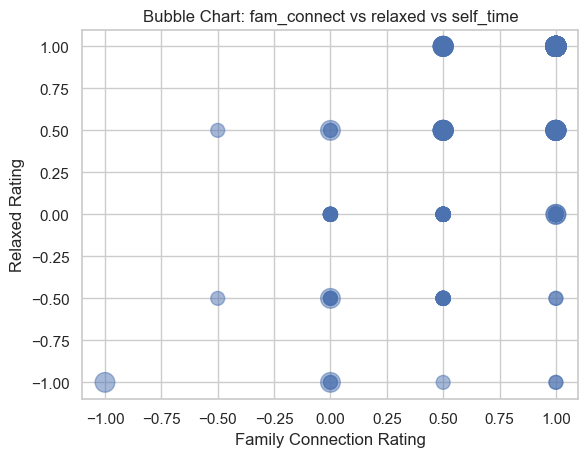

In [313]:
import matplotlib.pyplot as plt
x = data1['fam_connect']
y = data1['relaxed']
bubble_size = data1['self_time'] * 200  

# Create a scatter plot
plt.scatter(x, y, s=bubble_size, alpha=0.5)

# Labeling
plt.xlabel('Family Connection Rating')
plt.ylabel('Relaxed Rating')
plt.title('Bubble Chart: fam_connect vs relaxed vs self_time')

# Show the plot
plt.show()


# Data Pre Processing 

In [924]:
data2 = pd.read_csv('psyco.csv')

In [925]:
data2

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,1,Complete Physical Attendance,Yes
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,111,Complete Physical Attendance,Maybe
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0,1111,110,Complete Physical Attendance,Maybe
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5,1111,1100,Complete Physical Attendance,Yes


In [926]:
# Transform categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data2['prefer'] = LE.fit_transform(data2['prefer'])
data2['certaindays_hw'] = LE.fit_transform(data2['certaindays_hw'])


In [927]:
data2

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,0,2
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,0,1
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,0,2
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,0,2
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,1,0,2
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,111,0,0
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0,1111,110,0,0
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5,1111,1100,0,2


In [928]:
data2.isnull().sum()

age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

In [929]:
data2['line_of_work'].value_counts()

line_of_work
Teaching               217
Engineering            116
Management              66
Other                   40
Government Employee     35
Architect                3
APSPDCL                  1
Architecture             1
Name: count, dtype: int64

In [930]:
data2['line_of_work'].mode()

0    Teaching
Name: line_of_work, dtype: object

In [931]:
df = pd.DataFrame(data2['line_of_work'],data2['occupation'])

In [932]:
data2['occupation'].value_counts()

occupation
Working Professional                                    479
Student in College                                      358
Entrepreneur                                            119
Homemaker                                                82
Medical Professional aiding efforts against COVID-19     73
Currently Out of Work                                    44
Student in School                                        18
Retired/Senior Citizen                                    2
Name: count, dtype: int64

In [933]:
filtered1 = data2[(data2['occupation'] == 'Working Professional') & data2.isnull().any(axis=1)]
filtered1

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw


In [934]:
filtered2 = data2[(data2['occupation'] == 'Student in College') & data2.isnull().any(axis=1)]
filtered2

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,0,2
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,0,2
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,0,2
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,0,2
5,19-25,Male,Student in College,NaN,5,7,0.5,4,4,-1.0,-1.0,0.0,-0.5,0.0,0.0,110,1100,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,19-25,Male,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,0.0,1110,1111,1,2
957,19-25,Male,Student in College,NaN,7,4,0.5,2,1,0.0,-0.5,0.5,0.5,0.0,0.5,1100,1101,0,0
958,19-25,Male,Student in College,NaN,5,9,0.5,3,3,0.0,0.0,0.0,0.0,0.0,0.0,1100,1011,0,1
959,19-25,Male,Student in College,NaN,7,11,0.5,5,4,0.0,-1.0,1.0,-0.5,-1.0,-1.0,110,1100,0,2


In [935]:
filtered3 = data2[(data2['occupation'] == 'Entrepreneur') & data2.isnull().any(axis=1)]
filtered3

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
45,60+,Prefer not to say,Entrepreneur,NaN,12,12,3.0,5,5,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1,10,0,1
54,19-25,Male,Entrepreneur,NaN,12,12,1.5,2,2,0.5,-0.5,-0.5,0.5,-0.5,-0.5,1000,1,1,2
176,19-25,Male,Entrepreneur,NaN,5,4,1.5,2,1,-0.5,-0.5,0.0,0.5,-1.0,-0.5,1000,1000,0,0
200,19-25,Male,Entrepreneur,NaN,4,4,0.5,2,1,1.0,0.5,0.5,0.0,0.5,0.0,1101,1100,1,0
214,19-25,Male,Entrepreneur,NaN,7,5,0.5,3,3,-0.5,-1.0,0.5,0.0,-0.5,0.0,1100,111,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,1,0,2
1159,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,1,0,2
1162,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,1,0,2
1167,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,1,0,2


In [936]:
filtered4 = data2[(data2['occupation'] == 'Homemaker') & data2.isnull().any(axis=1)]
filtered4

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
114,33-40,Female,Homemaker,NaN,4,4,1.5,4,2,-0.5,-0.5,0.5,0.5,-0.5,-0.5,1000,1100,0,1
207,60+,Prefer not to say,Homemaker,NaN,12,12,3.0,1,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1111,1111,0,0
210,40-50,Female,Homemaker,NaN,7,9,0.5,3,3,0.0,-0.5,0.5,1.0,0.5,-0.5,1100,101,0,2
262,40-50,Female,Homemaker,NaN,5,9,0.5,1,2,0.5,0.0,0.5,0.5,0.0,0.0,100,10,1,0
270,60+,Female,Homemaker,NaN,4,4,0.5,4,4,0.0,0.5,0.5,0.5,0.5,0.5,1010,1001,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,111,0,0
1147,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,111,0,0
1155,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,111,0,0
1163,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,111,0,0


In [937]:
filtered5 = data2[(data2['occupation'] == 'Medical Professional aiding efforts against COVID-19') & data2.isnull().any(axis=1)]
filtered5

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
285,40-50,Male,Medical Professional aiding efforts against CO...,NaN,7,12,1.5,5,5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,110,1,1,0
312,40-50,Female,Medical Professional aiding efforts against CO...,NaN,9,4,2.5,3,5,-0.5,0.0,0.0,0.5,0.0,0.0,10,1000,0,1
382,50-60,Female,Medical Professional aiding efforts against CO...,NaN,7,5,0.5,3,2,-0.5,-0.5,0.5,-0.5,-0.5,0.5,1100,1,0,1
397,33-40,Female,Medical Professional aiding efforts against CO...,NaN,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0,100,1011,0,0
403,40-50,Female,Medical Professional aiding efforts against CO...,NaN,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5,1100,1111,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,33-40,Female,Medical Professional aiding efforts against CO...,NaN,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0,100,1011,0,0
1145,33-40,Female,Medical Professional aiding efforts against CO...,NaN,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0,100,1011,0,0
1153,33-40,Female,Medical Professional aiding efforts against CO...,NaN,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0,100,1011,0,0
1161,33-40,Female,Medical Professional aiding efforts against CO...,NaN,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0,100,1011,0,0


In [938]:
filtered6 = data2[(data2['occupation'] == 'Currently Out of Work') & data2.isnull().any(axis=1)]
filtered6

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
173,19-25,Female,Currently Out of Work,NaN,7,4,0.5,2,4,-0.5,-0.5,-0.5,0.5,0.0,0.0,100,1111,0,2
198,19-25,Female,Currently Out of Work,NaN,7,4,0.5,2,3,0.0,-1.0,0.5,1.0,0.0,0.0,1111,1000,0,2
203,19-25,Male,Currently Out of Work,NaN,9,4,1.5,5,3,-0.5,-0.5,0.5,0.5,0.0,0.5,1000,1,0,2
269,33-40,Male,Currently Out of Work,NaN,5,7,2.5,4,4,-0.5,0.5,0.5,0.5,1.0,0.5,101,1100,1,2
278,60+,Male,Currently Out of Work,NaN,4,4,0.5,5,2,-1.0,1.0,1.0,1.0,1.0,1.0,1110,100,1,0
282,60+,Male,Currently Out of Work,NaN,4,4,1.5,5,5,-0.5,1.0,1.0,1.0,1.0,1.0,1110,1,1,2
287,60+,Male,Currently Out of Work,NaN,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0,1110,1,0,1
374,26-32,Male,Currently Out of Work,NaN,5,4,2.5,4,4,-1.0,0.5,0.0,0.5,-0.5,-0.5,100,1101,0,1
394,50-60,Male,Currently Out of Work,NaN,11,4,1.5,2,4,0.0,-0.5,-1.0,0.0,-0.5,0.0,101,1001,1,2
482,60+,Male,Currently Out of Work,NaN,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0,1110,1,0,1


In [939]:
filtered7 = data2[(data2['occupation'] == 'Student in School') & data2.isnull().any(axis=1)]
filtered7

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,0,1
68,Dec-18,Male,Student in School,NaN,7,5,1.5,3,3,0.5,-1.0,0.5,-0.5,0.5,0.0,1111,1111,0,1
80,Dec-18,Female,Student in School,NaN,7,4,2.5,3,4,-0.5,-1.0,0.5,0.0,0.5,0.0,1000,1001,0,2
85,Dec-18,Male,Student in School,NaN,7,5,0.5,4,2,-0.5,-1.0,0.5,0.5,-0.5,0.0,10,1000,0,1
116,Dec-18,Female,Student in School,NaN,5,5,0.5,3,3,0.0,0.0,0.0,0.0,0.0,0.0,1111,1011,0,2
133,Dec-18,Prefer not to say,Student in School,NaN,9,11,1.5,2,4,0.0,-1.0,1.0,0.5,-1.0,-1.0,1001,1111,1,2
197,Dec-18,Female,Student in School,NaN,5,4,0.5,4,4,-1.0,-0.5,0.0,0.0,-1.0,0.5,1000,1101,0,0
215,Dec-18,Male,Student in School,NaN,7,5,0.5,3,3,0.5,0.0,1.0,1.0,0.5,0.5,1000,1000,1,2
218,Dec-18,Male,Student in School,NaN,7,5,0.5,2,1,0.0,0.5,0.5,1.0,0.5,0.5,1000,111,0,2
220,Dec-18,Prefer not to say,Student in School,NaN,7,4,0.5,1,1,-0.5,-1.0,-0.5,0.0,0.0,0.5,1,10,1,2


In [940]:
filtered8 = data2[(data2['occupation'] == 'Retired/Senior Citizen') & data2.isnull().any(axis=1)]
filtered8

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
72,19-25,Prefer not to say,Retired/Senior Citizen,NaN,4,9,2.5,3,3,0.5,-1.0,0.0,0.0,-1.0,0.0,1000,100,0,0
241,50-60,Male,Retired/Senior Citizen,NaN,12,12,0.5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1000,1,0,1


In [941]:
data2.loc[data2['occupation'] == 'Student in College', 'line_of_work'] = 'No Job'

In [942]:
data2.loc[data2['occupation'] == 'Entrepreneur', 'line_of_work'] = 'Entrepreneur'

In [943]:
data2.loc[data2['occupation'] == 'Homemaker', 'line_of_work'] = 'No Job'

In [944]:
data2.loc[data2['occupation'] == 'Medical Professional aiding efforts against COVID-19', 'line_of_work'] = 'Medical professional'

In [945]:
data2.loc[data2['occupation'] == 'Currently Out of Work', 'line_of_work'] = 'No Job'

In [946]:
data2.loc[data2['occupation'] == 'Student in School', 'line_of_work'] = 'No Job'

In [947]:
data2.loc[data2['occupation'] == 'Retired/Senior Citizen', 'line_of_work'] = 'Retired'

In [948]:
data2.isnull().sum()

age               0
gender            0
occupation        0
line_of_work      0
time_bp           0
time_dp           0
travel_time       0
easeof_online     0
home_env          0
prod_inc          0
sleep_bal         0
new_skill         0
fam_connect       0
relaxed           0
self_time         0
like_hw           0
dislike_hw        0
prefer            0
certaindays_hw    0
dtype: int64

In [949]:
data2['line_of_work'].value_counts()

line_of_work
No Job                  502
Teaching                217
Entrepreneur            119
Engineering             116
Medical professional     73
Management               66
Other                    40
Government Employee      35
Architect                 3
Retired                   2
APSPDCL                   1
Architecture              1
Name: count, dtype: int64

In [602]:
data2
# Now this has become a data with no missing values.

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,No Job,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,0,2
1,Dec-18,Male,Student in School,No Job,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,0,1
2,19-25,Male,Student in College,No Job,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,0,2
3,19-25,Male,Student in College,No Job,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,0,2
4,19-25,Female,Student in College,No Job,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,Entrepreneur,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,1,0,2
1171,26-32,Female,Homemaker,No Job,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,111,0,0
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0,1111,110,0,0
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5,1111,1100,0,2


In [603]:
# For gender we see the following
data2['gender'].value_counts()

gender
Male                 649
Female               518
Prefer not to say      8
Name: count, dtype: int64

In [604]:
# there are only 8 responses other than male and female. This can increase the complications and filling them with the mode value might not be fully correct
# Hence we drop these values
data2.drop(data2[data2['gender'] == 'Prefer not to say'].index, inplace=True)

In [605]:
data2.shape

(1167, 19)

In [606]:
data2['total_time_before_pandemic'] = data2['time_bp'] + data2['travel_time']


In [607]:
data2

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,total_time_before_pandemic
0,19-25,Male,Student in College,No Job,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,0,2,7.5
1,Dec-18,Male,Student in School,No Job,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,0,1,7.5
2,19-25,Male,Student in College,No Job,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,0,2,8.5
3,19-25,Male,Student in College,No Job,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,0,2,8.5
4,19-25,Female,Student in College,No Job,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,0,2,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,Entrepreneur,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,10,1,0,2,9.5
1171,26-32,Female,Homemaker,No Job,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,100,111,0,0,5.5
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0,1111,110,0,0,9.5
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5,1111,1100,0,2,12.5


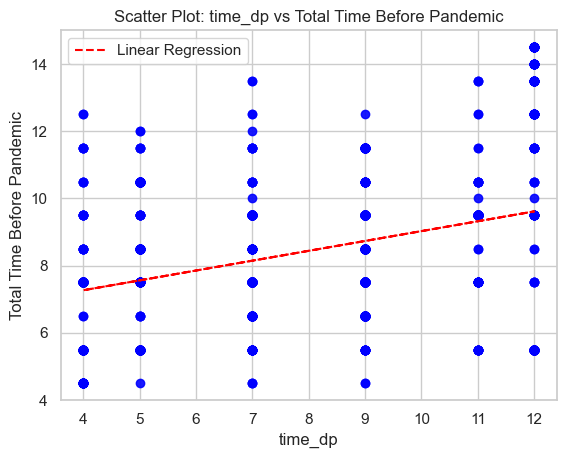

In [608]:
import matplotlib.pyplot as plt
import numpy as np

# Create the scatter plot
plt.scatter(data2['time_dp'], data2['total_time_before_pandemic'], color='blue', alpha=0.9)

# Add labels and title
plt.xlabel('time_dp')
plt.ylabel('Total Time Before Pandemic')
plt.title('Scatter Plot: time_dp vs Total Time Before Pandemic')

# Fit a linear regression line
fit = np.polyfit(data2['time_dp'], data2['total_time_before_pandemic'], 1)
fit_fn = np.poly1d(fit)

# Plot the regression line
plt.plot(data2['time_dp'], fit_fn(data2['time_dp']), color='red', linestyle='--', label='Linear Regression')

# Show the plot
plt.legend()
plt.show()


In [609]:
data2['like_hw'].value_counts()

like_hw
100     232
1100    188
1110    187
1000    186
1111     94
10       64
110      61
1010     55
1001     41
1011     17
1        15
11        9
1101      7
101       6
111       5
Name: count, dtype: int64

In [610]:
mapping10 = {1:'0', 10: '1', 11: '2', 100: '3', 101: '4',110:'5',111:'6',1000:'7',1001:'8',1010:'9',1011:'10',1100:'11',1101:'12',1110:'13',1111:'14'}
data2['like_hw'] = data2['like_hw'].replace(mapping10)

In [611]:
data2['like_hw'].value_counts()

like_hw
3     232
11    188
13    187
7     186
14     94
1      64
5      61
9      55
8      41
10     17
0      15
2       9
12      7
4       6
6       5
Name: count, dtype: int64

In [612]:
data2['dislike_hw'].value_counts()

dislike_hw
1111    262
1       211
1000    150
101     110
1100     87
111      67
1101     61
1011     59
100      44
1010     30
1110     20
1001     19
110      19
10       17
11       11
Name: count, dtype: int64

In [613]:
mapping12 = {1:'0', 10: '1', 11: '2', 100: '3', 101: '4',110:'5',111:'6',1000:'7',1001:'8',1010:'9',1011:'10',1100:'11',1101:'12',1110:'13',1111:'14'}
data2['dislike_hw'] = data2['dislike_hw'].replace(mapping12)

In [614]:
data2['dislike_hw'].value_counts()

dislike_hw
14    262
0     211
7     150
4     110
11     87
6      67
12     61
10     59
3      44
9      30
13     20
8      19
5      19
1      17
2      11
Name: count, dtype: int64

In [615]:
data2

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,total_time_before_pandemic
0,19-25,Male,Student in College,No Job,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,3,0,0,2,7.5
1,Dec-18,Male,Student in School,No Job,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,14,13,0,1,7.5
2,19-25,Male,Student in College,No Job,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,11,6,0,2,8.5
3,19-25,Male,Student in College,No Job,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,3,14,0,2,8.5
4,19-25,Female,Student in College,No Job,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,9,7,0,2,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,Entrepreneur,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0,1,0,0,2,9.5
1171,26-32,Female,Homemaker,No Job,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5,3,6,0,0,5.5
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0,14,5,0,0,9.5
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5,14,11,0,2,12.5


In [616]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# List of columns to transform
columns_to_transform = ['prod_inc', 'sleep_bal', 'new_skill', 'fam_connect', 'relaxed', 'self_time']

# Apply MinMax scaling to each specified column
for column in columns_to_transform:
    data2[column + '_num'] = scaler.fit_transform(data2[[column]])

# Drop the original columns
data2.drop(columns=columns_to_transform, inplace=True)


In [617]:
data2
# in this data now we have converted the ordinal attributes to numerical ones.

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,like_hw,dislike_hw,prefer,certaindays_hw,total_time_before_pandemic,prod_inc_num,sleep_bal_num,new_skill_num,fam_connect_num,relaxed_num,self_time_num
0,19-25,Male,Student in College,No Job,7,5,0.5,3,3,3,0,0,2,7.5,0.50,0.50,0.75,1.00,0.25,0.25
1,Dec-18,Male,Student in School,No Job,7,11,0.5,4,2,14,13,0,1,7.5,0.25,0.75,0.00,1.00,1.00,1.00
2,19-25,Male,Student in College,No Job,7,7,1.5,2,2,11,6,0,2,8.5,1.00,0.50,0.75,0.75,0.75,0.75
3,19-25,Male,Student in College,No Job,7,7,1.5,3,1,3,14,0,2,8.5,0.50,1.00,0.75,0.50,0.00,0.25
4,19-25,Female,Student in College,No Job,7,7,1.5,2,2,9,7,0,2,8.5,0.50,0.50,0.50,0.50,0.75,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,Entrepreneur,9,9,0.5,2,1,1,0,0,2,9.5,0.75,0.25,0.25,0.75,0.50,0.50
1171,26-32,Female,Homemaker,No Job,5,12,0.5,3,5,3,6,0,0,5.5,0.25,0.00,0.25,0.50,0.25,0.25
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,14,5,0,0,9.5,0.75,0.75,0.75,0.75,0.50,0.50
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,14,11,0,2,12.5,0.50,0.50,0.50,0.00,0.50,0.25


In [618]:
data2.to_csv('data_preprocessed.csv')

# Correlation

In [621]:
data_corr= pd.read_csv('data_preprocessed.csv')
del data_corr['Unnamed: 0']

In [622]:
data_corr

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,like_hw,dislike_hw,prefer,certaindays_hw,total_time_before_pandemic,prod_inc_num,sleep_bal_num,new_skill_num,fam_connect_num,relaxed_num,self_time_num
0,19-25,Male,Student in College,No Job,7,5,0.5,3,3,3,0,0,2,7.5,0.50,0.50,0.75,1.00,0.25,0.25
1,Dec-18,Male,Student in School,No Job,7,11,0.5,4,2,14,13,0,1,7.5,0.25,0.75,0.00,1.00,1.00,1.00
2,19-25,Male,Student in College,No Job,7,7,1.5,2,2,11,6,0,2,8.5,1.00,0.50,0.75,0.75,0.75,0.75
3,19-25,Male,Student in College,No Job,7,7,1.5,3,1,3,14,0,2,8.5,0.50,1.00,0.75,0.50,0.00,0.25
4,19-25,Female,Student in College,No Job,7,7,1.5,2,2,9,7,0,2,8.5,0.50,0.50,0.50,0.50,0.75,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,40-50,Female,Entrepreneur,Entrepreneur,9,9,0.5,2,1,1,0,0,2,9.5,0.75,0.25,0.25,0.75,0.50,0.50
1163,26-32,Female,Homemaker,No Job,5,12,0.5,3,5,3,6,0,0,5.5,0.25,0.00,0.25,0.50,0.25,0.25
1164,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,14,5,0,0,9.5,0.75,0.75,0.75,0.75,0.50,0.50
1165,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,14,11,0,2,12.5,0.50,0.50,0.50,0.00,0.50,0.25


In [623]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

categorical_variable = data_corr['gender']

all_variables = ['age','occupation','line_of_work','time_bp','time_dp','travel_time','easeof_online','home_env','like_hw','dislike_hw','prefer','certaindays_hw','total_time_before_pandemic',
                 'prod_inc_num','sleep_bal_num','new_skill_num','fam_connect_num','relaxed_num','self_time_num']

label_encoder = LabelEncoder()
for variable in all_variables:
    if data_corr[variable].dtype == 'O': 
        data_corr[variable] = label_encoder.fit_transform(data_corr[variable])

association_results = []


for variable in all_variables:
    # Create a contingency table
    contingency_table = pd.crosstab(categorical_variable, data_corr[variable])
    
    # Perform chi-square test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V as a measure of association
    n = contingency_table.sum().sum()
    cramers_v = (chi2_stat / (n * (min(contingency_table.shape) - 1)))**0.5
    
    association_results.append({
        'Variable': variable,
        'Chi2 Statistic': chi2_stat,
        'P-Value': p_value,
        'Cramér\'s V': cramers_v
    })

association_df = pd.DataFrame(association_results)
print(association_df.sort_values(by='Cramér\'s V', ascending=False))


                      Variable  Chi2 Statistic       P-Value  Cramér's V
2                 line_of_work      490.709725  3.068756e-98    0.648451
1                   occupation      345.875965  9.406441e-71    0.544408
0                          age      310.662479  4.242082e-64    0.515952
12  total_time_before_pandemic      243.911990  1.174764e-44    0.457174
4                      time_dp      216.866106  6.969851e-45    0.431083
15               new_skill_num      180.683399  5.318234e-38    0.393481
9                   dislike_hw      166.761569  3.085022e-28    0.378018
8                      like_hw      141.576318  3.446584e-23    0.348305
7                     home_env      128.893616  6.714218e-27    0.332338
13                prod_inc_num      124.784211  5.075607e-26    0.326997
17                 relaxed_num       99.316056  1.375437e-20    0.291725
3                      time_bp       71.300844  5.493143e-14    0.247179
10                      prefer       59.657532  1.1

In [624]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

categorical_variable = data_corr['self_time_num']

all_variables = ['age','occupation','line_of_work','time_bp','time_dp','travel_time','easeof_online','home_env','like_hw','dislike_hw','prefer','certaindays_hw','total_time_before_pandemic',
                 'prod_inc_num','sleep_bal_num','new_skill_num','fam_connect_num','relaxed_num','gender']

label_encoder = LabelEncoder()
for variable in all_variables:
    if data_corr[variable].dtype == 'O': 
        data_corr[variable] = label_encoder.fit_transform(data_corr[variable])

association_results = []


for variable in all_variables:
    # Create a contingency table
    contingency_table = pd.crosstab(categorical_variable, data_corr[variable])
    
    # Perform chi-square test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V as a measure of association
    n = contingency_table.sum().sum()
    cramers_v = (chi2_stat / (n * (min(contingency_table.shape) - 1)))**0.5
    
    association_results.append({
        'Variable': variable,
        'Chi2 Statistic': chi2_stat,
        'P-Value': p_value,
        'Cramér\'s V': cramers_v
    })

association_df = pd.DataFrame(association_results)
print(association_df.sort_values(by='Cramér\'s V', ascending=False))


                      Variable  Chi2 Statistic        P-Value  Cramér's V
17                 relaxed_num     1392.923287  5.404828e-287    0.546258
15               new_skill_num     1146.278542  5.006052e-234    0.495541
16             fam_connect_num     1004.253459  1.375560e-203    0.463827
14               sleep_bal_num      983.290489  4.231854e-199    0.458961
12  total_time_before_pandemic      836.429899  5.528383e-142    0.423301
0                          age      817.258766  4.675248e-157    0.418422
1                   occupation      695.483206  1.723034e-128    0.385992
4                      time_dp      654.853257  7.740185e-126    0.374547
13                prod_inc_num      632.885543  2.398664e-124    0.368211
8                      like_hw      576.609261   1.630928e-87    0.351460
9                   dislike_hw      555.818903   1.986402e-83    0.345065
2                 line_of_work      528.268499   2.976829e-84    0.336405
3                      time_bp      48

# Classification

# Classification with top 10 attributes

# Decision Tree

In [692]:
data_classification3 = pd.read_csv('data_preprocessed.csv')

In [693]:
data_classification3

,Unnamed: 0,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,...,dislike_hw,prefer,certaindays_hw,total_time_before_pandemic,prod_inc_num,sleep_bal_num,new_skill_num,fam_connect_num,relaxed_num,self_time_num
0,0,19-25,Male,Student in College,No Job,7,5,0.5,3,3,...,0,0,2,7.5,0.50,0.50,0.75,1.00,0.25,0.25
1,1,Dec-18,Male,Student in School,No Job,7,11,0.5,4,2,...,13,0,1,7.5,0.25,0.75,0.00,1.00,1.00,1.00
2,2,19-25,Male,Student in College,No Job,7,7,1.5,2,2,...,6,0,2,8.5,1.00,0.50,0.75,0.75,0.75,0.75
3,3,19-25,Male,Student in College,No Job,7,7,1.5,3,1,...,14,0,2,8.5,0.50,1.00,0.75,0.50,0.00,0.25
4,4,19-25,Female,Student in College,No Job,7,7,1.5,2,2,...,7,0,2,8.5,0.50,0.50,0.50,0.50,0.75,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,1170,40-50,Female,Entrepreneur,Entrepreneur,9,9,0.5,2,1,...,0,0,2,9.5,0.75,0.25,0.25,0.75,0.50,0.50
1163,1171,26-32,Female,Homemaker,No Job,5,12,0.5,3,5,...,6,0,0,5.5,0.25,0.00,0.25,0.50,0.25,0.25
1164,1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,...,5,0,0,9.5,0.75,0.75,0.75,0.75,0.50,0.50
1165,1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,...,11,0,2,12.5,0.50,0.50,0.50,0.00,0.50,0.25


In [694]:
# Transform categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_classification3['age'] = LE.fit_transform(data_classification3['age'])
data_classification3['occupation'] = LE.fit_transform(data_classification3['occupation'])
data_classification3['line_of_work'] = LE.fit_transform(data_classification3['line_of_work'])
data_classification3['gender'] = LE.fit_transform(data_classification3['gender'])

In [695]:
del data_classification3['fam_connect_num']
del data_classification3['prefer']
del data_classification3['easeof_online']
del data_classification3['travel_time']
del data_classification3['sleep_bal_num']
del data_classification3['relaxed_num']
del data_classification3['time_bp']
del data_classification3['certaindays_hw']
del data_classification3['self_time_num']
del data_classification3['Unnamed: 0']

In [696]:
data_classification3

,age,gender,occupation,line_of_work,time_dp,home_env,like_hw,dislike_hw,total_time_before_pandemic,prod_inc_num,new_skill_num
0,0,1,5,8,5,3,3,0,7.5,0.50,0.75
1,6,1,6,8,11,2,14,13,7.5,0.25,0.00
2,0,1,5,8,7,2,11,6,8.5,1.00,0.75
3,0,1,5,8,7,1,3,14,8.5,0.50,0.75
4,0,0,5,8,7,2,9,7,8.5,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...
1162,3,0,1,4,9,1,1,0,9.5,0.75,0.25
1163,1,0,2,8,12,5,3,6,5.5,0.25,0.25
1164,1,1,7,3,11,2,14,5,9.5,0.75,0.75
1165,1,1,7,3,12,2,14,11,12.5,0.50,0.50


In [697]:
data_classification4 = data_classification3[['age','occupation','line_of_work','time_dp','home_env','total_time_before_pandemic','prod_inc_num','new_skill_num','like_hw','dislike_hw','gender']]

In [698]:
data_classification4

,age,occupation,line_of_work,time_dp,home_env,total_time_before_pandemic,prod_inc_num,new_skill_num,like_hw,dislike_hw,gender
0,0,5,8,5,3,7.5,0.50,0.75,3,0,1
1,6,6,8,11,2,7.5,0.25,0.00,14,13,1
2,0,5,8,7,2,8.5,1.00,0.75,11,6,1
3,0,5,8,7,1,8.5,0.50,0.75,3,14,1
4,0,5,8,7,2,8.5,0.50,0.50,9,7,0
...,...,...,...,...,...,...,...,...,...,...,...
1162,3,1,4,9,1,9.5,0.75,0.25,1,0,0
1163,1,2,8,12,5,5.5,0.25,0.25,3,6,0
1164,1,7,3,11,2,9.5,0.75,0.75,14,5,1
1165,1,7,3,12,2,12.5,0.50,0.50,14,11,1


In [699]:
X = data_classification4.iloc[:, :-1].values   # predictor attributes
y = data_classification4.iloc[:, -1].values   # target attribute

In [700]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [701]:
from sklearn.tree import DecisionTreeClassifier

#default criterion/attribute selection metric is 'gini'
#DT = DecisionTreeClassifier(random_state= 0)
#To change the criterion to information gain see below:
DT = DecisionTreeClassifier(criterion ='entropy', random_state= 0)

In [702]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [703]:
y_pred = DT.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [704]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred)
cm3

array([[228,  29],
       [ 43, 284]], dtype=int64)

<Axes: >

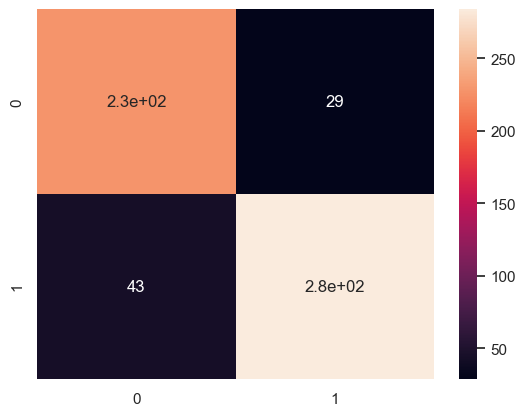

In [705]:
import seaborn as sns
sns.heatmap(cm3, annot=True)

In [706]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[228  29]
 [ 43 284]] 

Mean Absolute Error: 0.1232876712328767
Mean Squared Error: 0.1232876712328767
Root Mean Squared Error: 0.3511234415883917 

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       257
           1       0.91      0.87      0.89       327

    accuracy                           0.88       584
   macro avg       0.87      0.88      0.88       584
weighted avg       0.88      0.88      0.88       584

Accuracy: 0.8767123287671232


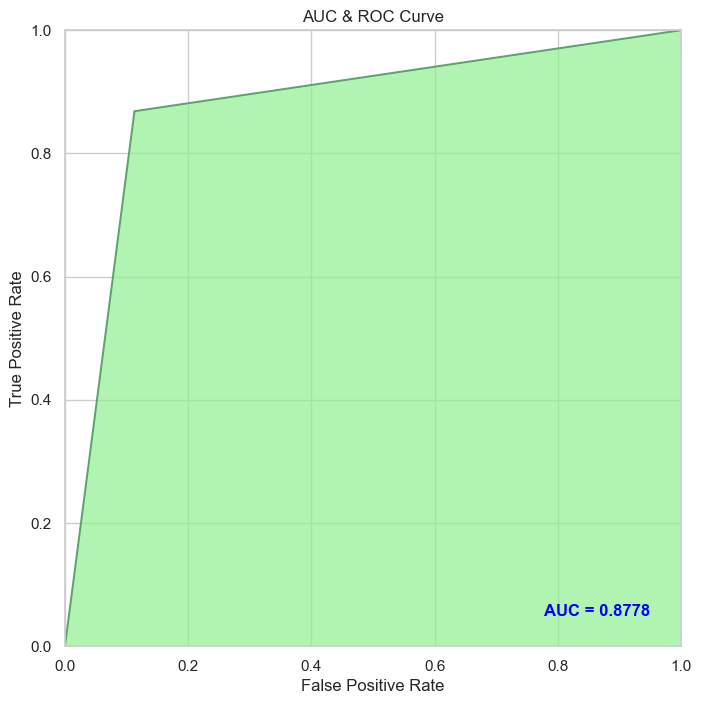

In [712]:
# Calculate the ROC and AUC and then plot them by using the matplotlib library

import matplotlib.pyplot as plt

auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [713]:
#minimal cost-complexity pruning
DT1 = DecisionTreeClassifier(random_state=0)

path = DT1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

DTs = []
for ccp_alpha in ccp_alphas:
    DT = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT.fit(X_train, y_train)
    DTs.append(DT)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        DTs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1067522132470701


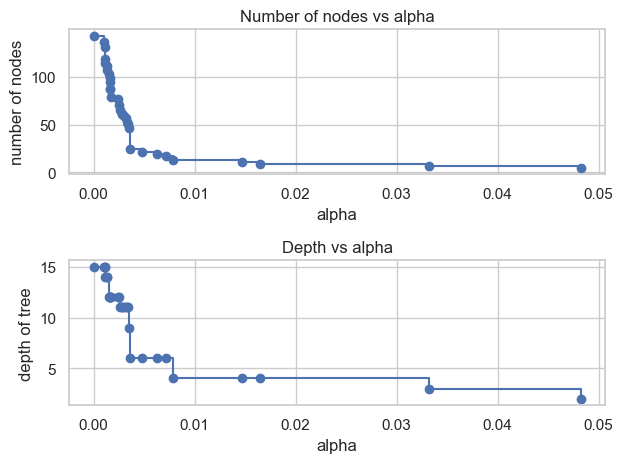

In [714]:
#remove the last element in DTs and ccp_alphas, because it is the trivial tree with only one node
DTs = DTs[:-1]
ccp_alphas = ccp_alphas[:-1]

#plots to show that the number of nodes and tree depth decreases as alpha increases
node_counts = [DT.tree_.node_count for DT in DTs]
depth = [DT.tree_.max_depth for DT in DTs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

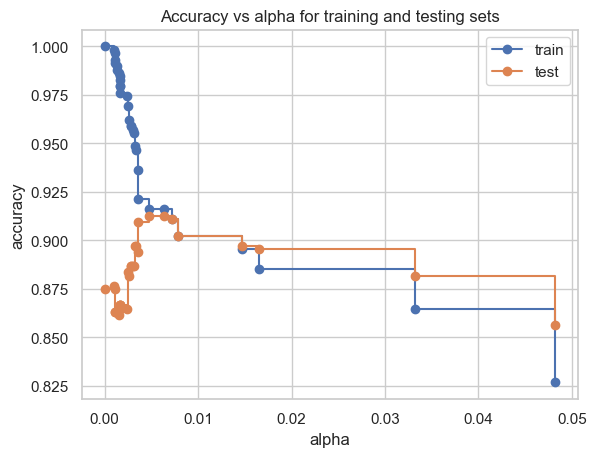

In [715]:
train_scores = [DT.score(X_train, y_train) for DT in DTs]
test_scores = [DT.score(X_test, y_test) for DT in DTs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()



# K - Nearest Neighbours

In [739]:
data_classification5= pd.read_csv('data_preprocessed.csv')

In [740]:
# Transform categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_classification5['age'] = LE.fit_transform(data_classification5['age'])
data_classification5['occupation'] = LE.fit_transform(data_classification5['occupation'])
data_classification5['line_of_work'] = LE.fit_transform(data_classification5['line_of_work'])
data_classification5['gender'] = LE.fit_transform(data_classification5['gender'])

In [741]:
del data_classification5['fam_connect_num']
del data_classification5['prefer']
del data_classification5['easeof_online']
del data_classification5['travel_time']
del data_classification5['sleep_bal_num']
del data_classification5['time_bp']
del data_classification5['relaxed_num']
del data_classification5['certaindays_hw']
del data_classification5['self_time_num']
del data_classification5['Unnamed: 0']

In [742]:
data_classification6 = data_classification5[['age','occupation','line_of_work','time_dp','home_env','total_time_before_pandemic','prod_inc_num','new_skill_num','like_hw','dislike_hw','gender']]
data_classification6

,age,occupation,line_of_work,time_dp,home_env,total_time_before_pandemic,prod_inc_num,new_skill_num,like_hw,dislike_hw,gender
0,0,5,8,5,3,7.5,0.50,0.75,3,0,1
1,6,6,8,11,2,7.5,0.25,0.00,14,13,1
2,0,5,8,7,2,8.5,1.00,0.75,11,6,1
3,0,5,8,7,1,8.5,0.50,0.75,3,14,1
4,0,5,8,7,2,8.5,0.50,0.50,9,7,0
...,...,...,...,...,...,...,...,...,...,...,...
1162,3,1,4,9,1,9.5,0.75,0.25,1,0,0
1163,1,2,8,12,5,5.5,0.25,0.25,3,6,0
1164,1,7,3,11,2,9.5,0.75,0.75,14,5,1
1165,1,7,3,12,2,12.5,0.50,0.50,14,11,1


In [743]:
X = data_classification6.iloc[:, :-1].values   # predictor attributes
y = data_classification6.iloc[:, -1].values   # target attribute

In [744]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [746]:
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test, y_pred)
cm6

array([[227,  30],
       [ 24, 303]], dtype=int64)

<Axes: >

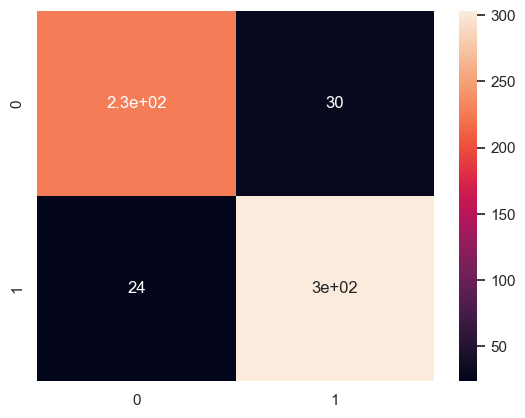

In [747]:
import seaborn as sns
sns.heatmap(cm6, annot=True)

In [745]:
#kNN
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors=3)

#fitting the clasifier to the data
knn.fit(X_train,y_train)

#predicted values using the knn model
y_pred=knn.predict(X_test)

#performance metrics
from sklearn import metrics
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[227  30]
 [ 24 303]] 

Mean Absolute Error: 0.09246575342465753
Mean Squared Error: 0.09246575342465753
Root Mean Squared Error: 0.30408182027976866 

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       257
           1       0.91      0.93      0.92       327

    accuracy                           0.91       584
   macro avg       0.91      0.90      0.91       584
weighted avg       0.91      0.91      0.91       584

Accuracy: 0.9075342465753424


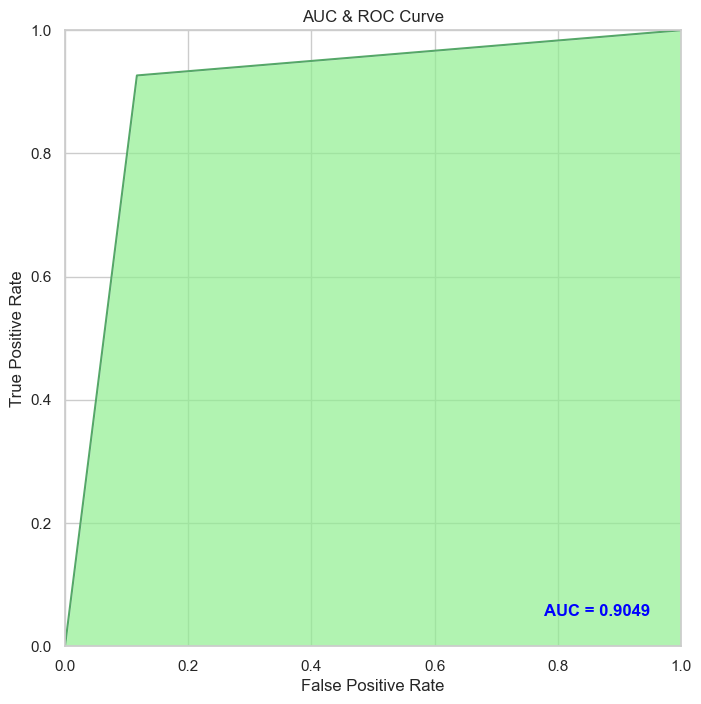

In [725]:
# Calculate the ROC and AUC and then plot them by using the matplotlib library

import matplotlib.pyplot as plt

auc = metrics.roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [726]:
# trying k=1 through k=5 and record accuracy
k_range = range(1, 11)

scores = []

for k in k_range:
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.8886986301369864, 0.8767123287671232, 0.9075342465753424, 0.8784246575342466, 0.8886986301369864, 0.8784246575342466, 0.898972602739726, 0.8886986301369864, 0.8955479452054794, 0.8852739726027398]


Text(0, 0.5, 'Accuracy')

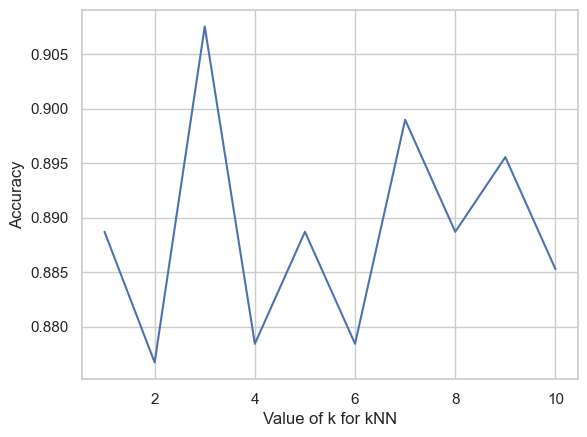

In [727]:
# plot the relationship between k values and accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy')

# ADA Boost

In [765]:
data_classification7= pd.read_csv('data_preprocessed.csv')

In [766]:
# Transform categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_classification7['age'] = LE.fit_transform(data_classification5['age'])
data_classification7['occupation'] = LE.fit_transform(data_classification5['occupation'])
data_classification7['line_of_work'] = LE.fit_transform(data_classification5['line_of_work'])
data_classification7['gender'] = LE.fit_transform(data_classification5['gender'])

In [767]:
del data_classification7['fam_connect_num']
del data_classification7['prefer']
del data_classification7['easeof_online']
del data_classification7['travel_time']
del data_classification7['sleep_bal_num']
del data_classification7['time_bp']
del data_classification7['relaxed_num']
del data_classification7['certaindays_hw']
del data_classification7['self_time_num']
del data_classification7['Unnamed: 0']

In [768]:
data_classification8 = data_classification7[['age','occupation','line_of_work','time_dp','home_env','total_time_before_pandemic','prod_inc_num','new_skill_num','like_hw','dislike_hw','gender']]

In [769]:
X = data_classification8.iloc[:, :-1].values   # predictor attributes
y = data_classification8.iloc[:, -1].values   # target attribute

In [770]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [776]:
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_ada)
cm9

array([[217,  40],
       [ 17, 310]], dtype=int64)

<Axes: >

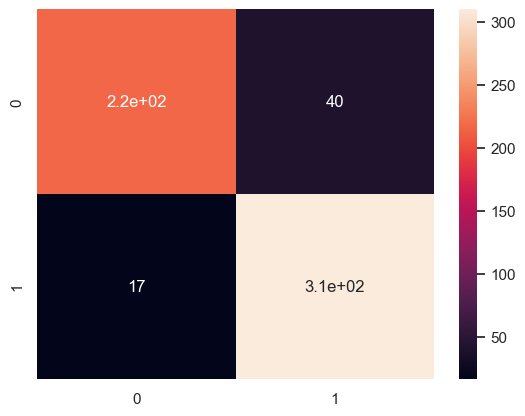

In [777]:
import seaborn as sns
sns.heatmap(cm9, annot=True)

In [778]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.1)

# Fit the classifier on the training data
ada_boost.fit(X_train, y_train)

# Predicted values using the AdaBoost model
y_pred_ada = ada_boost.predict(X_test)

# Performance metrics
print(confusion_matrix(y_test, y_pred_ada), '\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)), '\n')

print(classification_report(y_test, y_pred_ada))
print("Accuracy:", accuracy_score(y_test, y_pred_ada))


[[217  40]
 [ 17 310]] 

Mean Absolute Error: 0.0976027397260274
Mean Squared Error: 0.0976027397260274
Root Mean Squared Error: 0.3124143718301503 

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       257
           1       0.89      0.95      0.92       327

    accuracy                           0.90       584
   macro avg       0.91      0.90      0.90       584
weighted avg       0.90      0.90      0.90       584

Accuracy: 0.9023972602739726


C:\Users\leonp\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


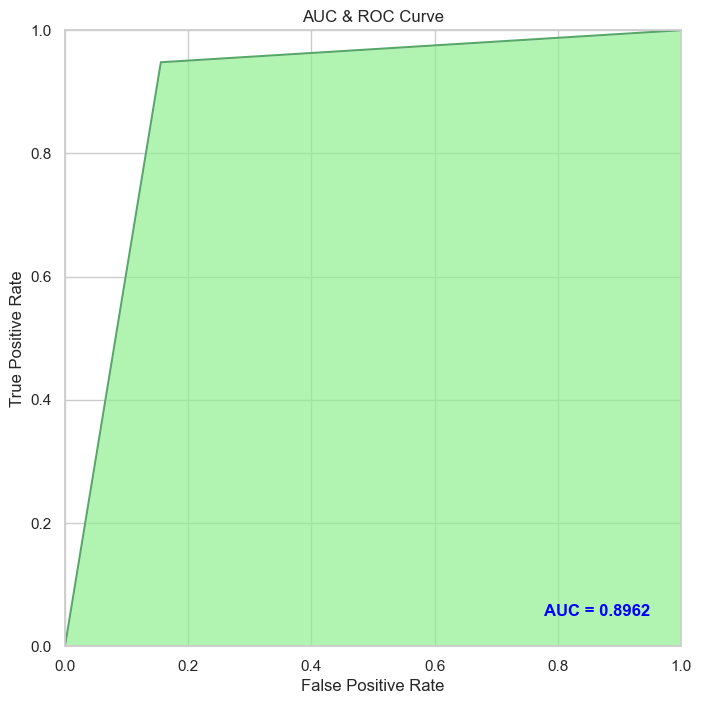

In [780]:
# Calculate the ROC and AUC and then plot them by using the matplotlib library

import matplotlib.pyplot as plt

auc = metrics.roc_auc_score(y_test, y_pred_ada)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_ada)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Regression

# Random forest regression with top 10 attributes only

In [807]:
data_regression1 = pd.read_csv('data_preprocessed.csv')

In [808]:
# Transform categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_regression1['age'] = LE.fit_transform(data_regression1['age'])
data_regression1['occupation'] = LE.fit_transform(data_regression1['occupation'])
data_regression1['line_of_work'] = LE.fit_transform(data_regression1['line_of_work'])
data_regression1['gender'] = LE.fit_transform(data_regression1['gender'])

In [809]:
del data_regression1['Unnamed: 0']
del data_regression1['line_of_work']
del data_regression1['dislike_hw']
del data_regression1['time_bp']
del data_regression1['certaindays_hw']
del data_regression1['prefer']
del data_regression1['easeof_online']
del data_regression1['home_env']
del data_regression1['travel_time']
del data_regression1['gender']

In [810]:
data_regression2 = data_regression1[['age','occupation','relaxed_num','like_hw','time_dp','prod_inc_num','new_skill_num','fam_connect_num','sleep_bal_num','total_time_before_pandemic','self_time_num']]

In [811]:
data_regression2

,age,occupation,relaxed_num,like_hw,time_dp,prod_inc_num,new_skill_num,fam_connect_num,sleep_bal_num,total_time_before_pandemic,self_time_num
0,0,5,0.25,3,5,0.50,0.75,1.00,0.50,7.5,0.25
1,6,6,1.00,14,11,0.25,0.00,1.00,0.75,7.5,1.00
2,0,5,0.75,11,7,1.00,0.75,0.75,0.50,8.5,0.75
3,0,5,0.00,3,7,0.50,0.75,0.50,1.00,8.5,0.25
4,0,5,0.75,9,7,0.50,0.50,0.50,0.50,8.5,0.50
...,...,...,...,...,...,...,...,...,...,...,...
1162,3,1,0.50,1,9,0.75,0.25,0.75,0.25,9.5,0.50
1163,1,2,0.25,3,12,0.25,0.25,0.50,0.00,5.5,0.25
1164,1,7,0.50,14,11,0.75,0.75,0.75,0.75,9.5,0.50
1165,1,7,0.50,14,12,0.50,0.50,0.00,0.50,12.5,0.25


In [812]:
X =data_regression1.iloc[:,:-1].values    # predictor attributes
y =data_regression1.iloc[:,-1].values     # target attribute

In [813]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Mean Absolute Error: 0.05524326985799589
Mean Squared Error: 0.014650016179320888
Root Mean Squared Error: 0.12103725120524213 

R2 score: 0.8015617809263884
Adjusted R2 score: 0.7980986357418577


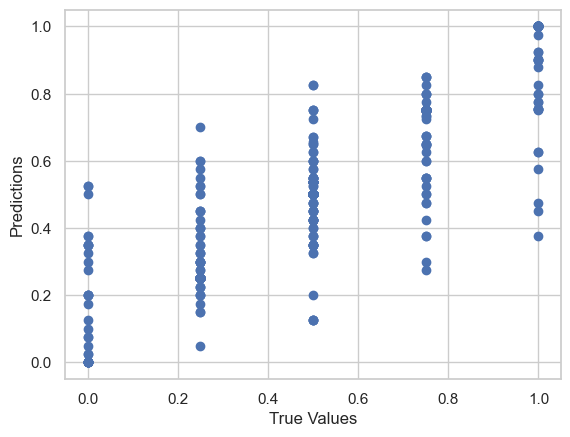

In [814]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)  # You can adjust the number of estimators

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '\n')

print("R2 score:", r2_score(y_test, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-X_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)


# Visualizing feature importances 
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


# Ridge Regression

In [800]:
data_regression3 = pd.read_csv('data_preprocessed.csv')

In [801]:
# Transform categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_regression3['age'] = LE.fit_transform(data_regression3['age'])
data_regression3['occupation'] = LE.fit_transform(data_regression3['occupation'])
data_regression3['line_of_work'] = LE.fit_transform(data_regression3['line_of_work'])
data_regression3['gender'] = LE.fit_transform(data_regression3['gender'])

In [802]:
del data_regression3['Unnamed: 0']
del data_regression3['line_of_work']
del data_regression3['dislike_hw']
del data_regression3['time_bp']
del data_regression3['certaindays_hw']
del data_regression3['prefer']
del data_regression3['easeof_online']
del data_regression3['home_env']
del data_regression3['travel_time']
del data_regression3['gender']

In [803]:
data_regression4 = data_regression3[['age','occupation','relaxed_num','like_hw','time_dp','prod_inc_num','new_skill_num','fam_connect_num','sleep_bal_num','total_time_before_pandemic','self_time_num']]

In [804]:
X =data_regression4.iloc[:,:-1].values    # predictor attributes
y =data_regression4.iloc[:,-1].values     # target attribute

In [805]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

Mean Absolute Error: 0.11652874073282923
Mean Squared Error: 0.024073913729415437
Root Mean Squared Error: 0.15515770599430578 

R2 score: 0.6739126764009885
Adjusted R2 score: 0.6682217981531873


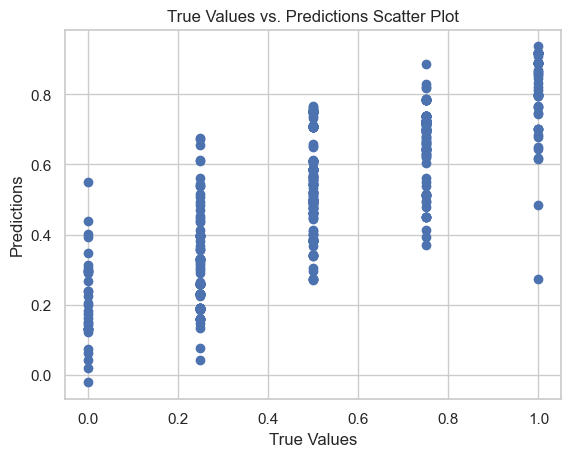

In [806]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Creating a Ridge Regressor
ridge_model = Ridge(alpha=1.0) # Kept the regularization strength as 1 for penalties.

# Fitting the model to the training data
ridge_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluating the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)), '\n')

print("R2 score:", r2_score(y_test, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (len(y_pred) - 1) / (len(y_pred) - X_test.shape[1] - 1)
print("Adjusted R2 score:", adj_r2)

# Visualizing scatter plot of true vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs. Predictions Scatter Plot')
plt.show()


# Clustering

# K Modes

In [997]:
data_clus1 = pd.read_csv('data_preprocessed.csv')

In [998]:
data_clus1

,Unnamed: 0,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,...,dislike_hw,prefer,certaindays_hw,total_time_before_pandemic,prod_inc_num,sleep_bal_num,new_skill_num,fam_connect_num,relaxed_num,self_time_num
0,0,19-25,Male,Student in College,No Job,7,5,0.5,3,3,...,0,0,2,7.5,0.50,0.50,0.75,1.00,0.25,0.25
1,1,Dec-18,Male,Student in School,No Job,7,11,0.5,4,2,...,13,0,1,7.5,0.25,0.75,0.00,1.00,1.00,1.00
2,2,19-25,Male,Student in College,No Job,7,7,1.5,2,2,...,6,0,2,8.5,1.00,0.50,0.75,0.75,0.75,0.75
3,3,19-25,Male,Student in College,No Job,7,7,1.5,3,1,...,14,0,2,8.5,0.50,1.00,0.75,0.50,0.00,0.25
4,4,19-25,Female,Student in College,No Job,7,7,1.5,2,2,...,7,0,2,8.5,0.50,0.50,0.50,0.50,0.75,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,1170,40-50,Female,Entrepreneur,Entrepreneur,9,9,0.5,2,1,...,0,0,2,9.5,0.75,0.25,0.25,0.75,0.50,0.50
1163,1171,26-32,Female,Homemaker,No Job,5,12,0.5,3,5,...,6,0,0,5.5,0.25,0.00,0.25,0.50,0.25,0.25
1164,1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,...,5,0,0,9.5,0.75,0.75,0.75,0.75,0.50,0.50
1165,1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,...,11,0,2,12.5,0.50,0.50,0.50,0.00,0.50,0.25


In [999]:
# Transform categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_clus1['age'] = LE.fit_transform(data_clus1['age'])
data_clus1['occupation'] = LE.fit_transform(data_clus1['occupation'])
data_clus1['line_of_work'] = LE.fit_transform(data_clus1['line_of_work'])
data_clus1['gender'] = LE.fit_transform(data_clus1['gender'])
del data_clus1['Unnamed: 0']

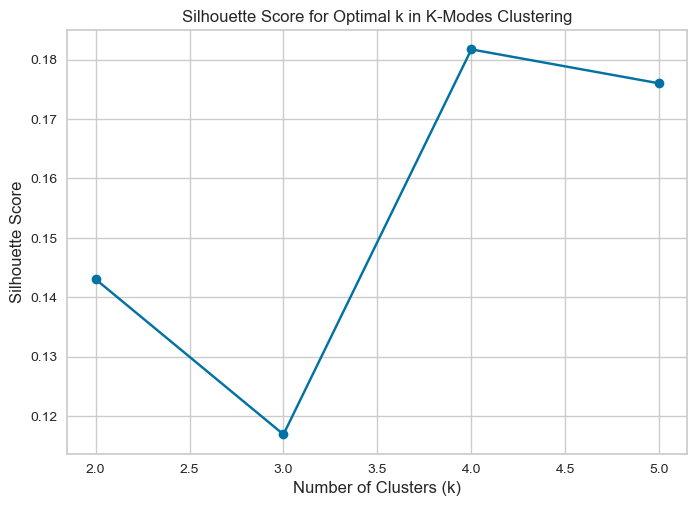

In [1000]:
from sklearn.metrics import silhouette_score, pairwise_distances

silhouette_scores = []
for k in range(2, 6):
    k_modes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters = k_modes.fit_predict(data_clus1)
    silhouette_avg = silhouette_score(pairwise_distances(data_clus1, metric='hamming'), clusters)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k in K-Modes Clustering')
plt.show()

In [1001]:
from kmodes.kmodes import KModes

# Initialize K-Modes with the desired number of clusters
k = 4
k_modes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)

# Fit the model to the data
clusters = k_modes.fit_predict(data_clus1)

# Display cluster centroids (modes)
print("Cluster Centroids:")
print(k_modes.cluster_centroids_)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 235, cost: 11847.0
Run 1, iteration: 2/100, moves: 156, cost: 11708.0
Run 1, iteration: 3/100, moves: 68, cost: 11708.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 273, cost: 11835.0
Run 2, iteration: 2/100, moves: 117, cost: 11449.0
Run 2, iteration: 3/100, moves: 158, cost: 11287.0
Run 2, iteration: 4/100, moves: 21, cost: 11271.0
Run 2, iteration: 5/100, moves: 20, cost: 11271.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 262, cost: 11516.0
Run 3, iteration: 2/100, moves: 104, cost: 11364.0
Run 3, iteration: 3/100, moves: 44, cost: 11364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 325, cost: 11254.0
Run 4, iteration: 2/100, moves: 72, cost: 11229.0
Run 4, iteration: 3/10

In [1002]:
k_modes.labels_

array([1, 0, 1, ..., 3, 3, 3], dtype=uint16)

In [1003]:
#append dataframe with cluster number
data_clus1['cluster'] = k_modes.labels_

In [1004]:
k_modes.labels_ == 0

array([False,  True, False, ..., False, False, False])

In [1005]:
#view proterties of each cluster
cluster1=data_clus1.query("cluster == 0")
cluster2=data_clus1.query("cluster == 1")
cluster1=data_clus1.query("cluster == 2")
cluster2=data_clus1.query("cluster == 3")

In [1006]:
k_modes.cluster_centroids_

array([[ 4.  ,  0.  ,  7.  ,  8.  ,  7.  , 12.  ,  0.5 ,  4.  ,  4.  ,
         3.  ,  0.  ,  0.  ,  1.  ,  5.5 ,  0.25,  0.25,  0.25,  0.  ,
         0.25,  0.25],
       [ 0.  ,  1.  ,  5.  ,  8.  ,  7.  ,  4.  ,  0.5 ,  3.  ,  3.  ,
         7.  , 14.  ,  0.  ,  2.  ,  7.5 ,  0.5 ,  0.5 ,  0.75,  0.75,
         0.5 ,  0.5 ],
       [ 1.  ,  0.  ,  7.  , 11.  ,  9.  ,  9.  ,  1.5 ,  1.  ,  3.  ,
        13.  ,  4.  ,  1.  ,  2.  ,  6.5 ,  0.75,  0.75,  1.  ,  1.  ,
         1.  ,  1.  ],
       [ 3.  ,  1.  ,  7.  ,  3.  ,  9.  ,  9.  ,  0.5 ,  2.  ,  2.  ,
        14.  , 14.  ,  0.  ,  2.  ,  9.5 ,  0.5 ,  0.5 ,  0.75,  0.75,
         0.5 ,  0.5 ]])

In [1007]:
cluster1_mode = k_modes.cluster_centroids_[0]
cluster2_mode = k_modes.cluster_centroids_[1]
cluster3_mode = k_modes.cluster_centroids_[2]
cluster4_mode = k_modes.cluster_centroids_[3]

In [1008]:
cluster1_mode_p1= cluster1_mode[:]

In [1009]:
cluster2_mode_p2= cluster2_mode[:]

In [1010]:
cluster3_mode_p3= cluster3_mode[:]

In [1011]:
cluster4_mode_p4= cluster4_mode[:]

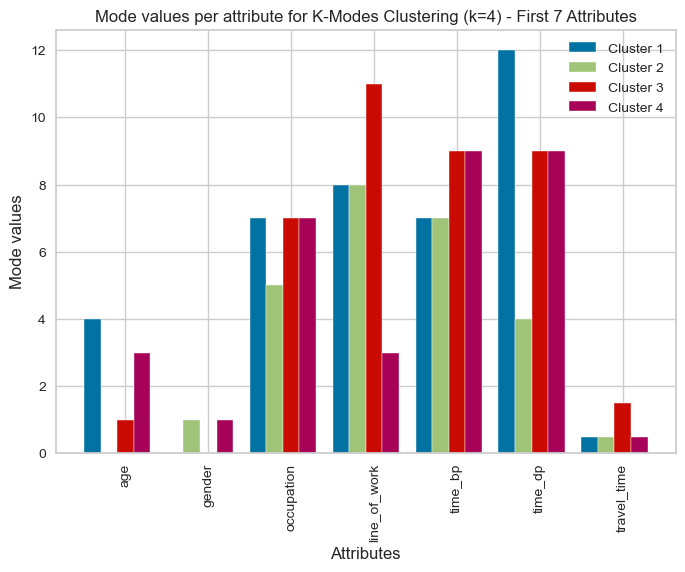

In [1012]:
from kmodes.kmodes import KModes
import numpy as np
import matplotlib.pyplot as plt

data = data_clus1

# Initializing K-Modes with 4 clusters
k = 4
k_modes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)

# Fitting the model to the data
clusters = k_modes.fit_predict(data)

cluster_means = [cluster1_mode_p1, cluster2_mode_p2, cluster3_mode_p3, cluster4_mode_p4]

X = data.columns[:7]  # Selecting the first 7 attributes

# Setting up the bar chart
X_axis = np.arange(len(X))

# Plotting mode values for each cluster
for i in range(k):
    plt.bar(X_axis + 0.2 * (i - k // 2), cluster_means[i][:7], 0.2, label=f'Cluster {i + 1}')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Attributes")
plt.ylabel("Mode values")
plt.title("Mode values per attribute for K-Modes Clustering (k=4) - First 7 Attributes")
plt.legend()
plt.show()


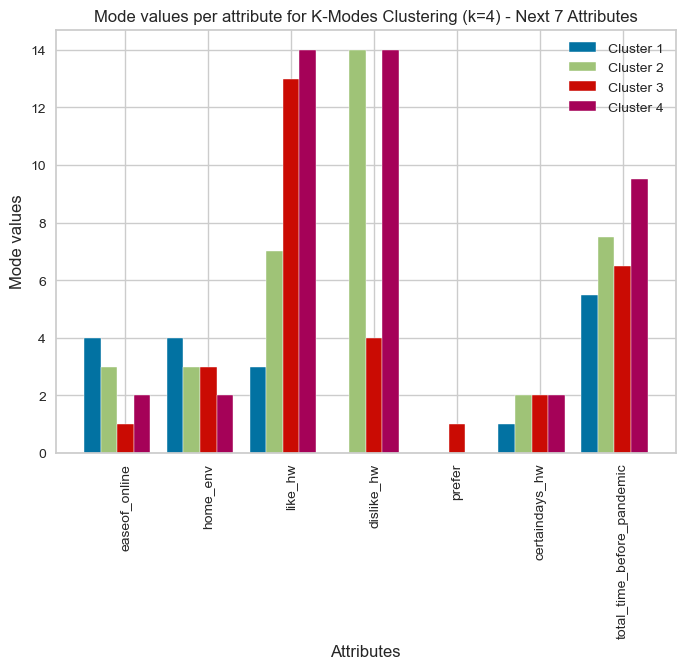

In [1013]:
X = data.columns[7:14]  # Selecting the next 7 attributes

# Setting up the bar chart
X_axis = np.arange(len(X))

# Plotting mode values for each cluster
for i in range(k):
    plt.bar(X_axis + 0.2 * (i - k // 2), cluster_means[i][7:14], 0.2, label=f'Cluster {i + 1}')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Attributes")
plt.ylabel("Mode values")
plt.title("Mode values per attribute for K-Modes Clustering (k=4) - Next 7 Attributes")
plt.legend()
plt.show()



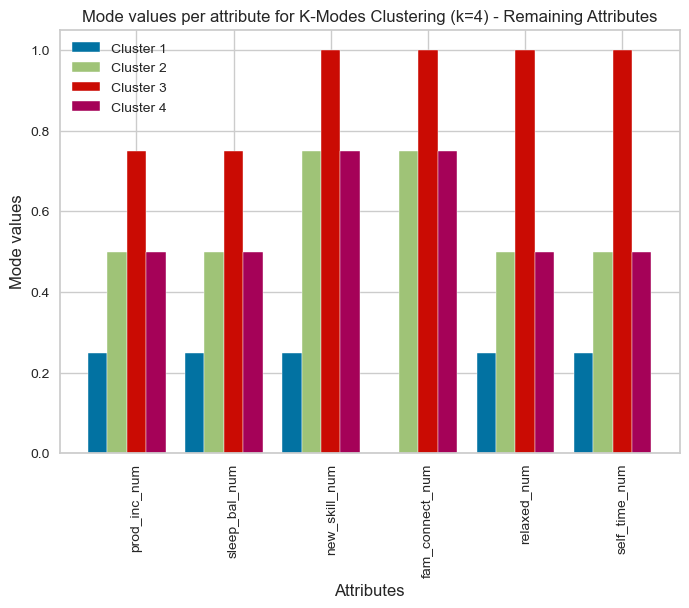

In [1014]:
X = data.columns[14:-1]  # Selecting the remaining attributes

# Setting up the bar chart
X_axis = np.arange(len(X))

# Plotting mode values for each cluster
for i in range(k):
    plt.bar(X_axis + 0.2 * (i - k // 2), cluster_means[i][14:], 0.2, label=f'Cluster {i + 1}')

plt.xticks(X_axis, X, rotation='vertical')
plt.xlabel("Attributes")
plt.ylabel("Mode values")
plt.title("Mode values per attribute for K-Modes Clustering (k=4) - Remaining Attributes")
plt.legend()
plt.show()
